In [3]:
##################################### HELPER FUNCTIONS AND CONFIGURATIONS #########################################
import seaborn as sns # for data visualization
from matplotlib.collections import PathCollection
import os
import pprint
import random
import statistics
import scipy.stats
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [15, 10]
import json
import pandas as pd
import glob
import math
import ast
%matplotlib inline

pp       =  pprint.PrettyPrinter(compact=True)

LOGFILES =  glob.glob('logs/1800_18_10_22/*.json' )

print(len(LOGFILES),"logs")

#=== line colors and styles

linestyles = {
    #=======floorplans===============
    'office'              : 'dotted' ,
    'warehouse'           : 'dashed' ,
    'factory'             : 'dashdot',
    "scattered_obstacles" : 'dotted',
    #=======algorithms================
    #------exploration---------------- 
    'Atlas'      :    'solid',
    #----relay placement--------------
    'CARA'       :    'dotted',
    'DBRA'       :    'dashed',
    #---- number of robots------------
    '15'         :    'dotted',
    '25'         :    'dashed',
    '50'         :    'dashdot',
}

linecolors = {
    #=======floorplans==============
    'office'              : 'orange',
    'warehouse'           : 'green',
    'factory'             : 'purple',
    "scattered_obstacles" : 'blue',
    #=======algorithms==============
    #------exploration--------------
    'Atlas'      :  'royalblue',
    #------relay placement----------
    'CARA'       :     'blue',
    'DBRA'       :     'red',
     #---- number of robots------------
    (15, 'CARA')    :    'xkcd:iris',
    (15, 'DBRA')    :    'xkcd:deep rose',
    (25, 'CARA')    :    'xkcd:turquoise',
    (25, 'DBRA')    :    'xkcd:orange red',
    (50, 'CARA')    :    'xkcd:bright blue',
    (50, 'DBRA')    :    'xkcd:red',

   }

#=== helper functions

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m, h)

def mode_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = scipy.stats.mode(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m[0][0], h)

1799 logs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


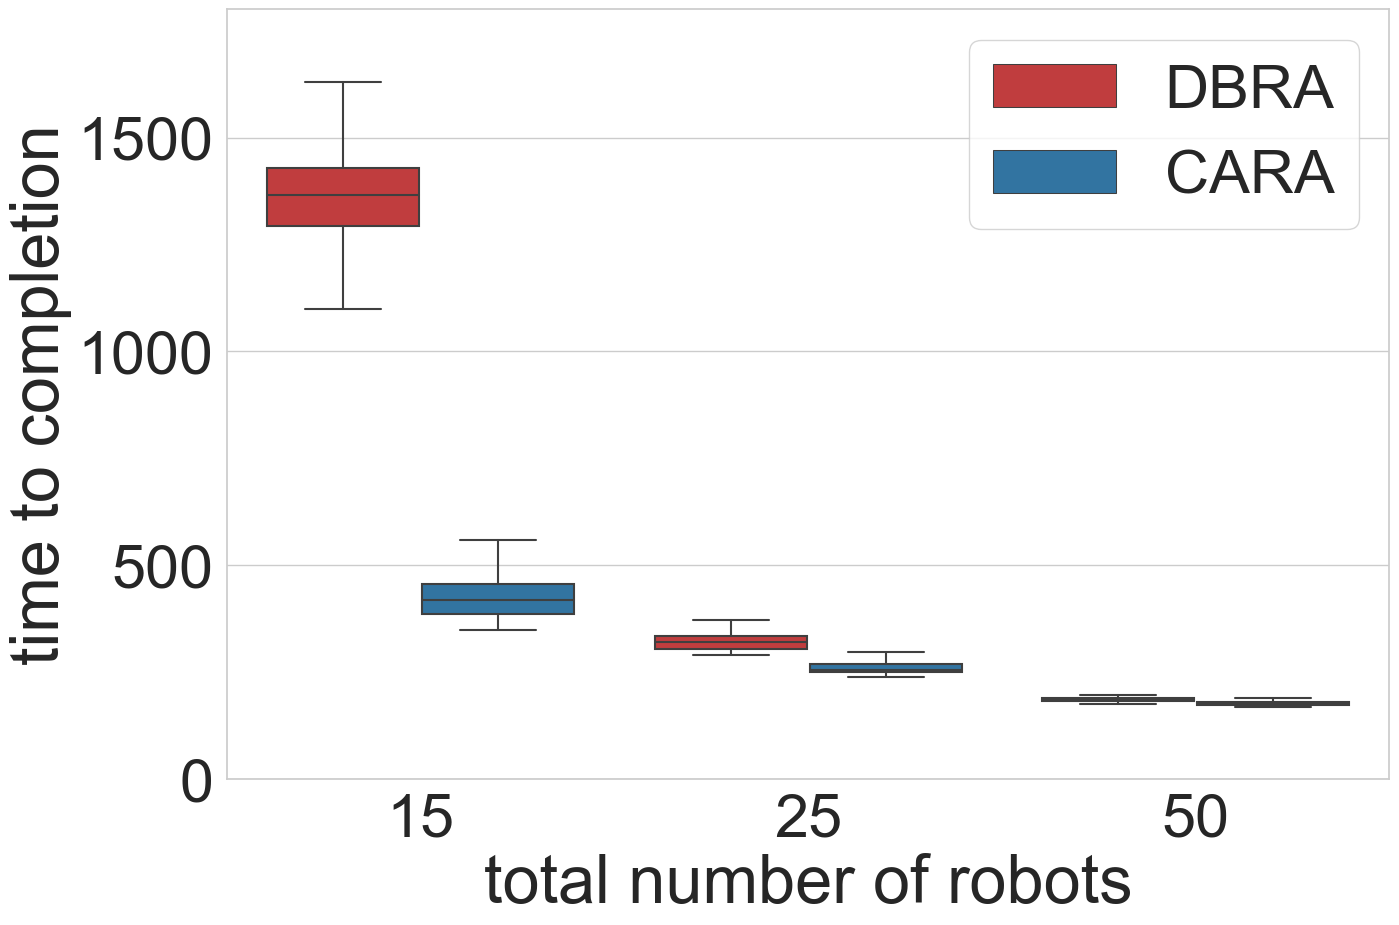

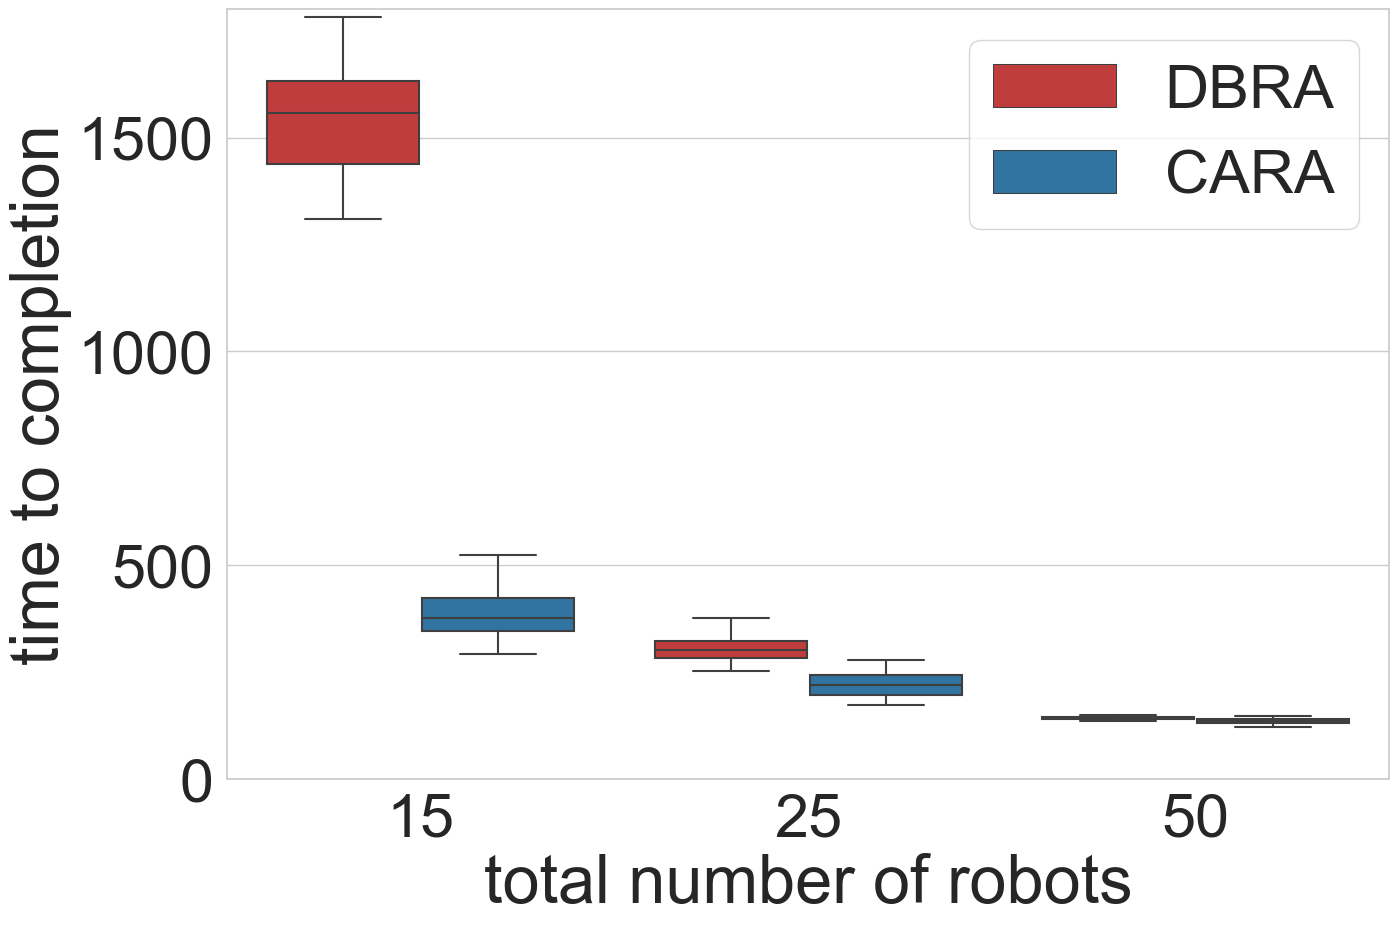

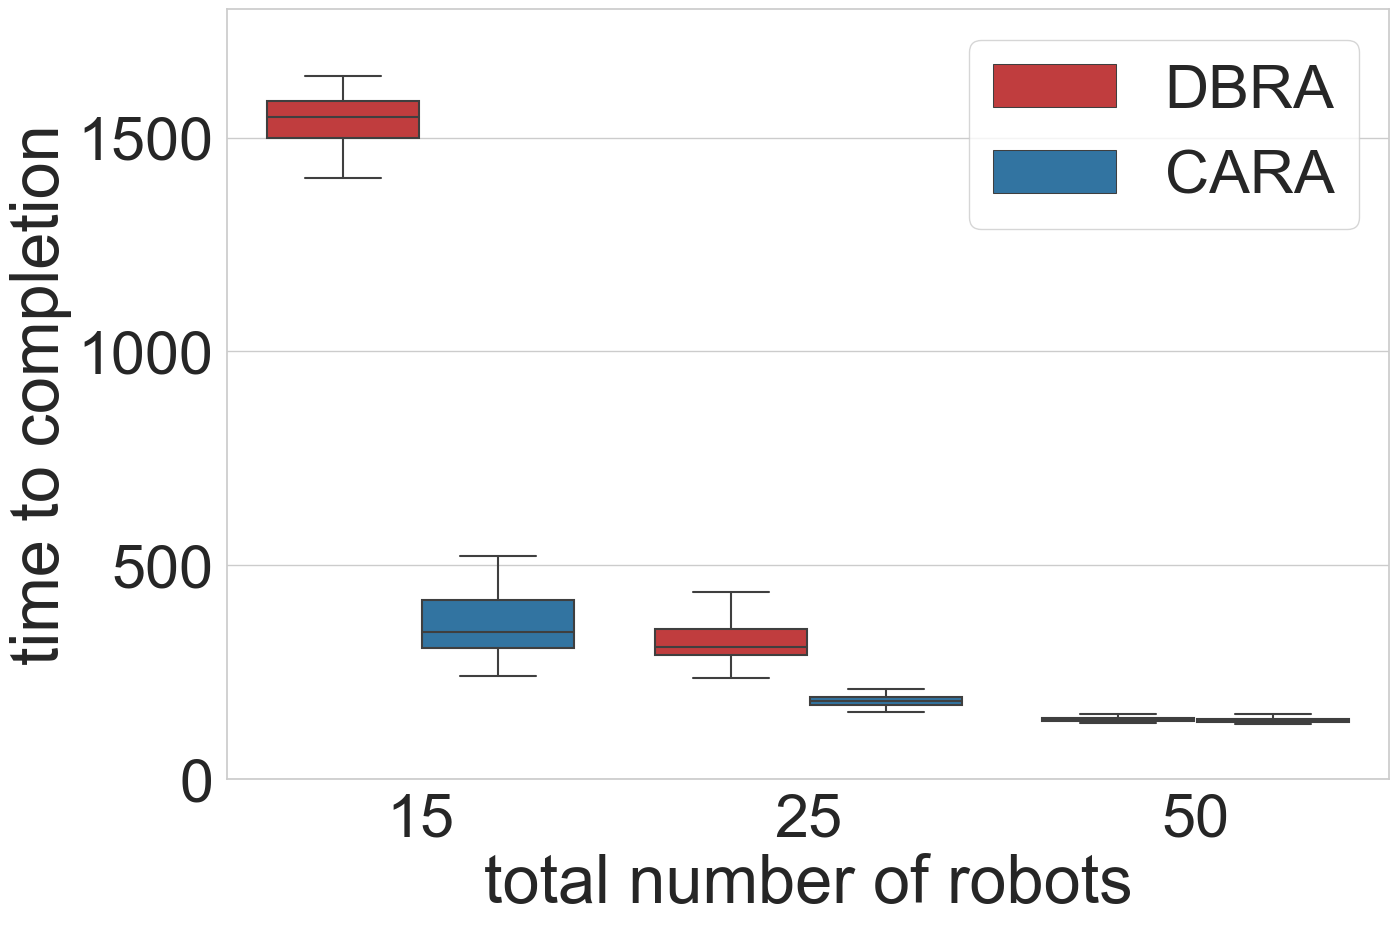

In [4]:

#============ Time To Completion
plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [15, 10]

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# format -> data = {seed1: {config: {....}}, timeToCompletion: 2142}, seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines  = [json.loads(l) for l in f]
    for line in lines:
        if line["type"] == "simSetting":
            numRobots             = line['simSetting']['numRobots'] 
            floorplan             = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            
        
        if ((line["type"] == "KPI") and ('timeToCompletion' in line.keys())):
            if line['timeToCompletion'] != None:
                timeToCompletion      = line['timeToCompletion']
                break
    
        
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "timeToComletion": timeToCompletion,
        }
    ]

floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()
my_palette      = {"CARA": "tab:blue", "DBRA": "tab:red"} 
sns.set(font_scale=4)
sns.set_style("whitegrid")
for floorplan in floorplans:
    (fig,ax) = plt.subplots()
      
    df  = pd.DataFrame([d for d in data if d['floorplan'] == floorplan])
    sns.boxplot(
        x="numRobots", y="timeToComletion", hue ="relayAlgorithm", palette=my_palette, data=df, hue_order=["DBRA","CARA"], showfliers = False
    )

    plt.legend(loc="upper right")
    plt.ylabel("time to completion")
    plt.xlabel("total number of robots")
    ax.set(ylim = (0, 1800))
    
    fig.savefig(os.path.join('logs','timeToCompletion_{0}.eps'.format(floorplan)),bbox_inches='tight')
    fig.savefig(os.path.join('logs','timeToCompletion_{0}.pdf'.format(floorplan)),bbox_inches='tight')





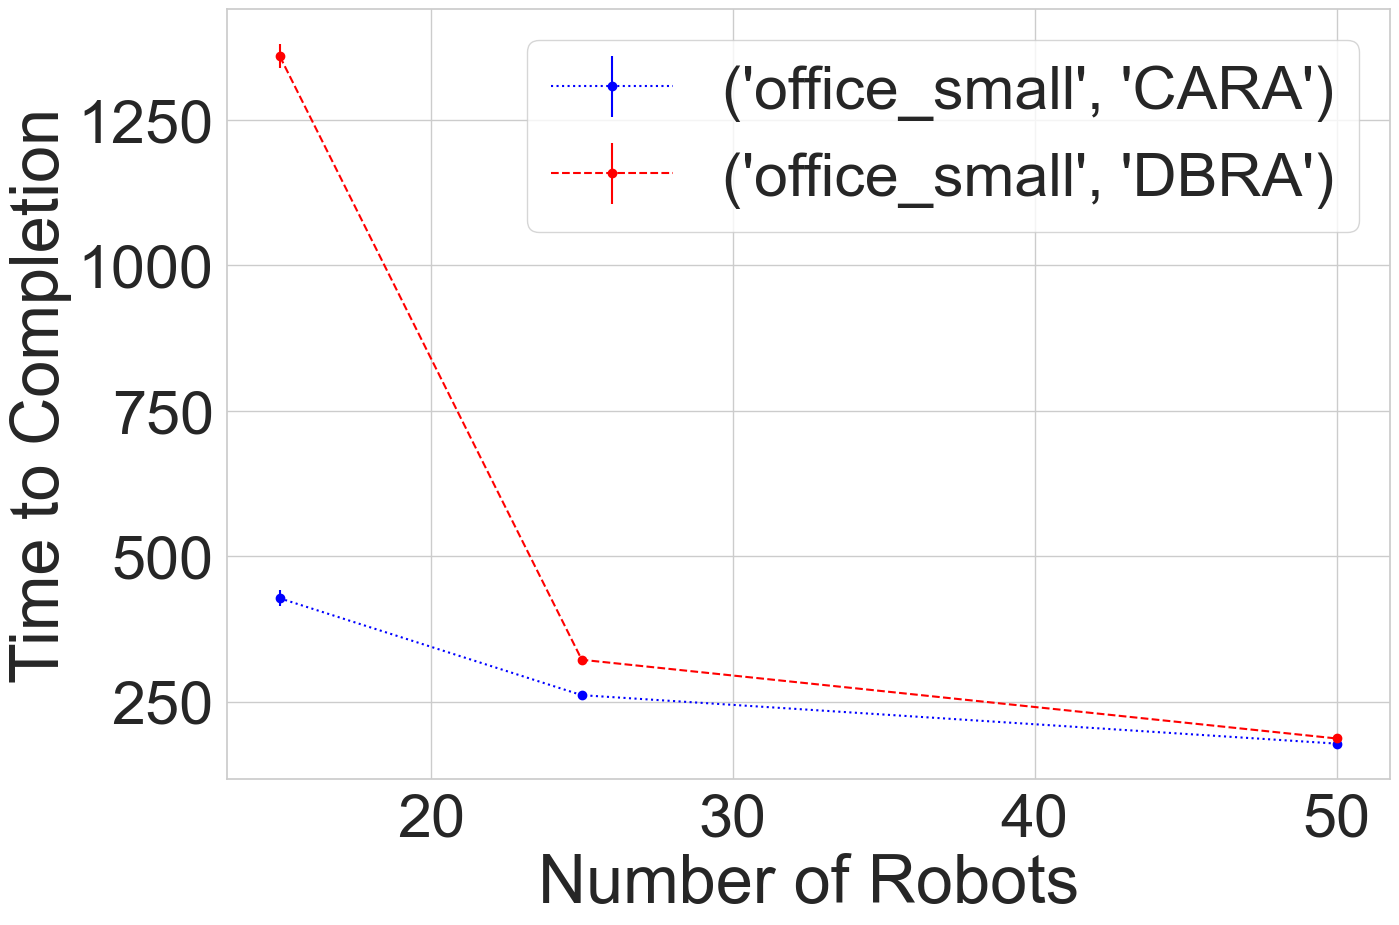

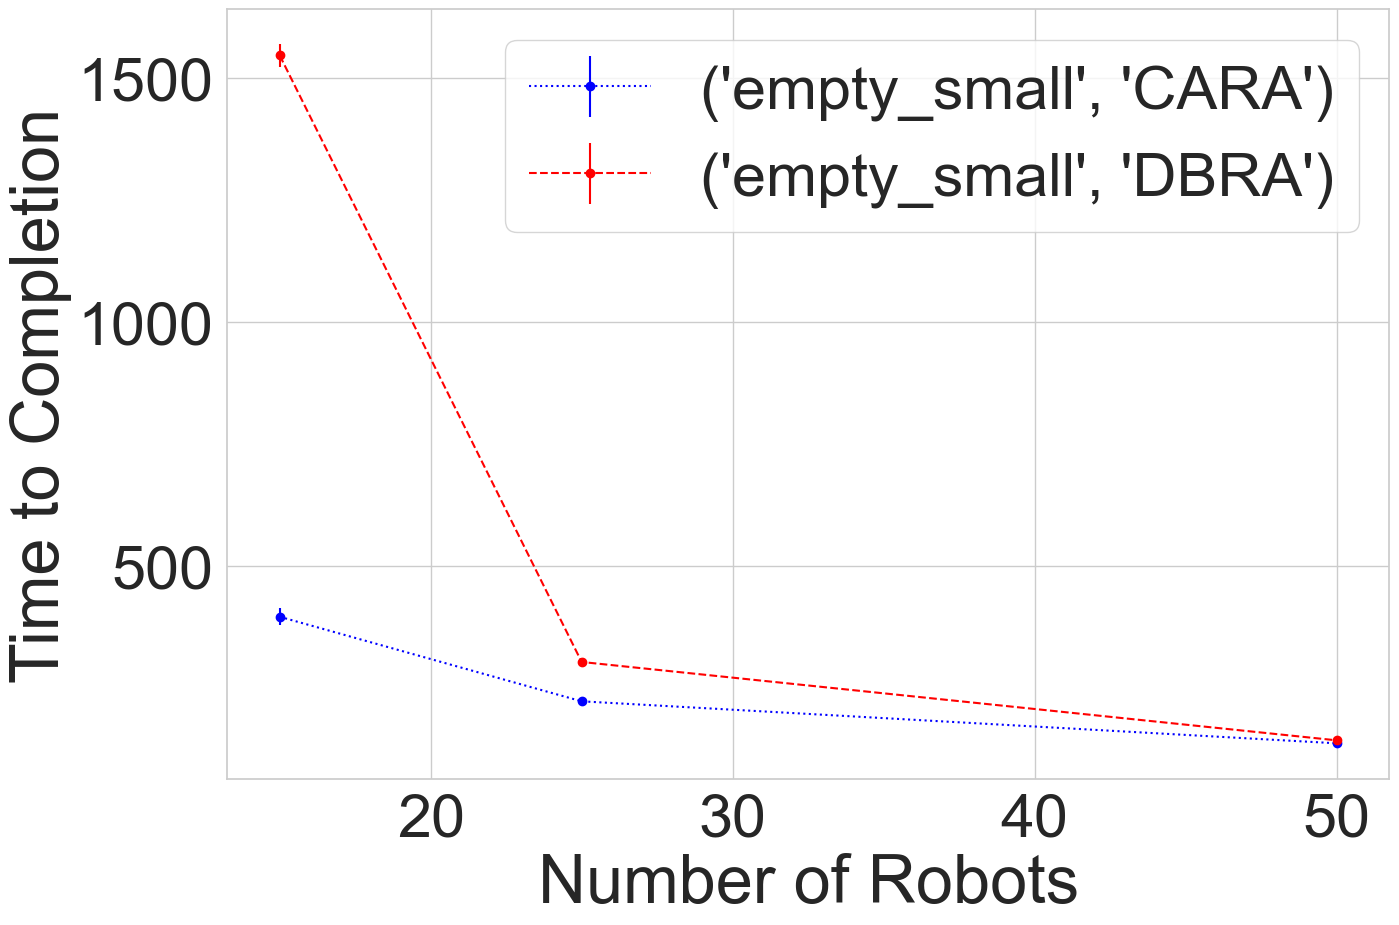

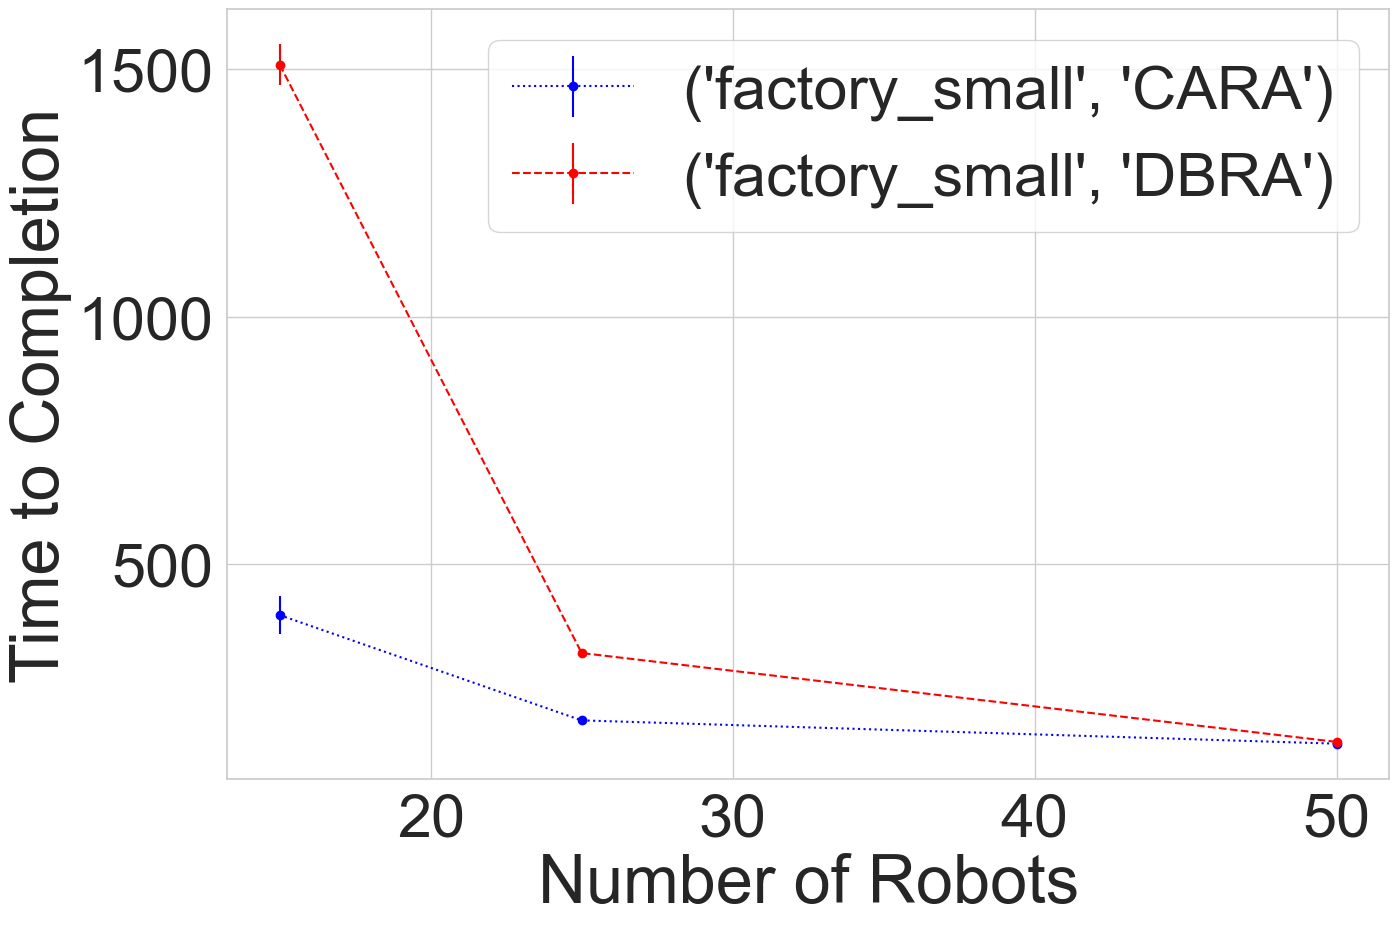

In [5]:

#============ Time To Completion
plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [15, 10]

# format -> data = {seed1: {config: {....}}, timeToCompletion: 2142}, seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines  = [json.loads(l) for l in f]
    for line in lines:
        if line["type"] == "simSetting":
            numRobots             = line['simSetting']['numRobots'] 
            floorplan             = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            
        
        if ((line["type"] == "KPI") and ('timeToCompletion' in line.keys())):
            if line['timeToCompletion'] != None:
                timeToCompletion      = line['timeToCompletion']
                break
 
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "timeToComletion": timeToCompletion,
        }
    ]

floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()

for floorplan in floorplans:
    (fig,ax) = plt.subplots()
    lines    = {}

    for relayAlgorithm in relayAlgorithms:
        toPlot = {}
        x      = []
        y      = []
        yerr   = []
        
        for value in numRobots:
            toPlot[value] = {}
            (m, h) = mean_confidence_interval(
                [
                 d["timeToComletion"] for d in data       if 
                 d['numRobots']      == value             and 
                 d['floorplan']      == floorplan         and 
                 d['relayAlgorithm'] == relayAlgorithm
                ]
            )
            toPlot[value]["mean"] = m
            toPlot[value]["yerr"] = h
        x                = numRobots
        y                = [p["mean"] for p in toPlot.values()]
        yerr             = [p["yerr"] for p in toPlot.values()]
        lines[(floorplan, relayAlgorithm)] = ax.errorbar(x, y, yerr=yerr,linestyle=linestyles[relayAlgorithm],color=linecolors[relayAlgorithm],label=(floorplan, relayAlgorithm), marker='o')
           
    ax.grid(True, zorder=5)
    plt.xlabel("Number of Robots")
    plt.ylabel("Time to Completion")
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


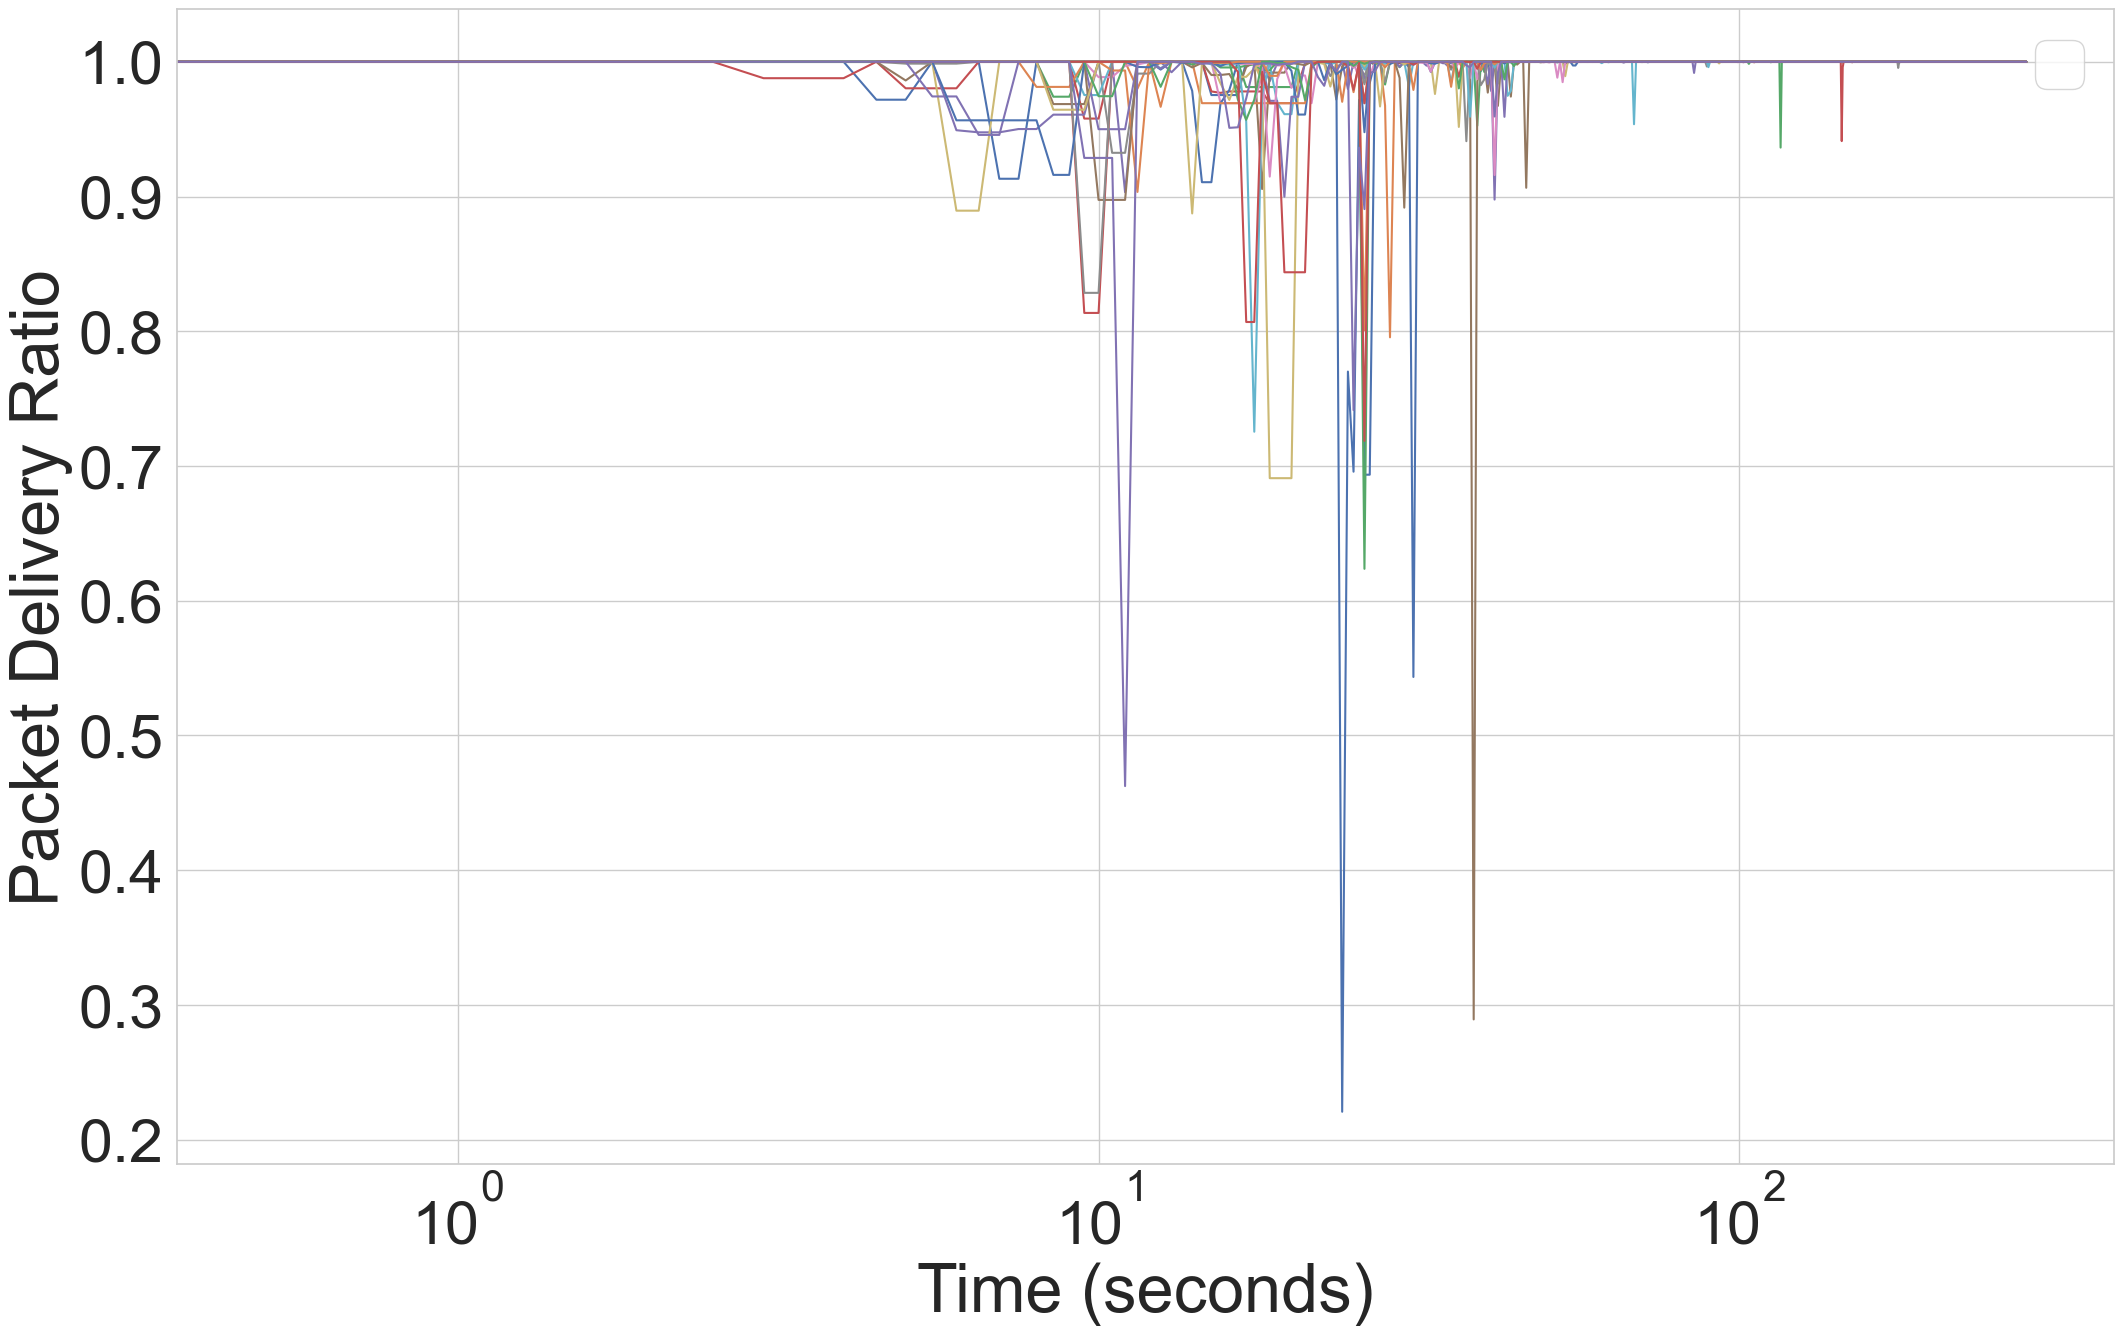

In [6]:
#============ Plot Average PDR Vs. Time
import math

plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [25, 15]

# format -> data = {seed1: {config: {....}}, PDRs: [[1,1,1,1], [1,1,1,1], ...], numOfRelays: [0, 1,2, ..]},
#                   seed2: {...} , ...}
data       =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines       = [json.loads(l) for l in f]
    PDRs        = []
    numOfRelays = []
    time        = []
    for line in lines:
        if line["type"] == "simSetting":
            numRobots       = line['simSetting']['numRobots'] 
            floorplan       = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            
        
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())) :
            PDRs         += [line['PDRs']]
            numOfRelays  += [line['numOfRelays']]
            time         += [line['time']]
 
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "PDRs":            PDRs,
         "numOfRelays":     numOfRelays,
         "time":            time,
        }
    ]

floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))

numRobots.sort()
(fig,ax) = plt.subplots()
lines    = {}
for i in range(len(data[0]["PDRs"][0])):    
    pdrsPerDotBot = [d[i] for d in data[0]["PDRs"]]
    y             = pdrsPerDotBot
    x             = data[0]["time"]
    lines[i]      = ax.plot(x,y)

#convert x-axis to Logarithmic scale
plt.xscale("log")
plt.xlabel("Time (seconds)")
plt.ylabel("Packet Delivery Ratio")
plt.legend()
alllines = lines
plt.show()
    
            

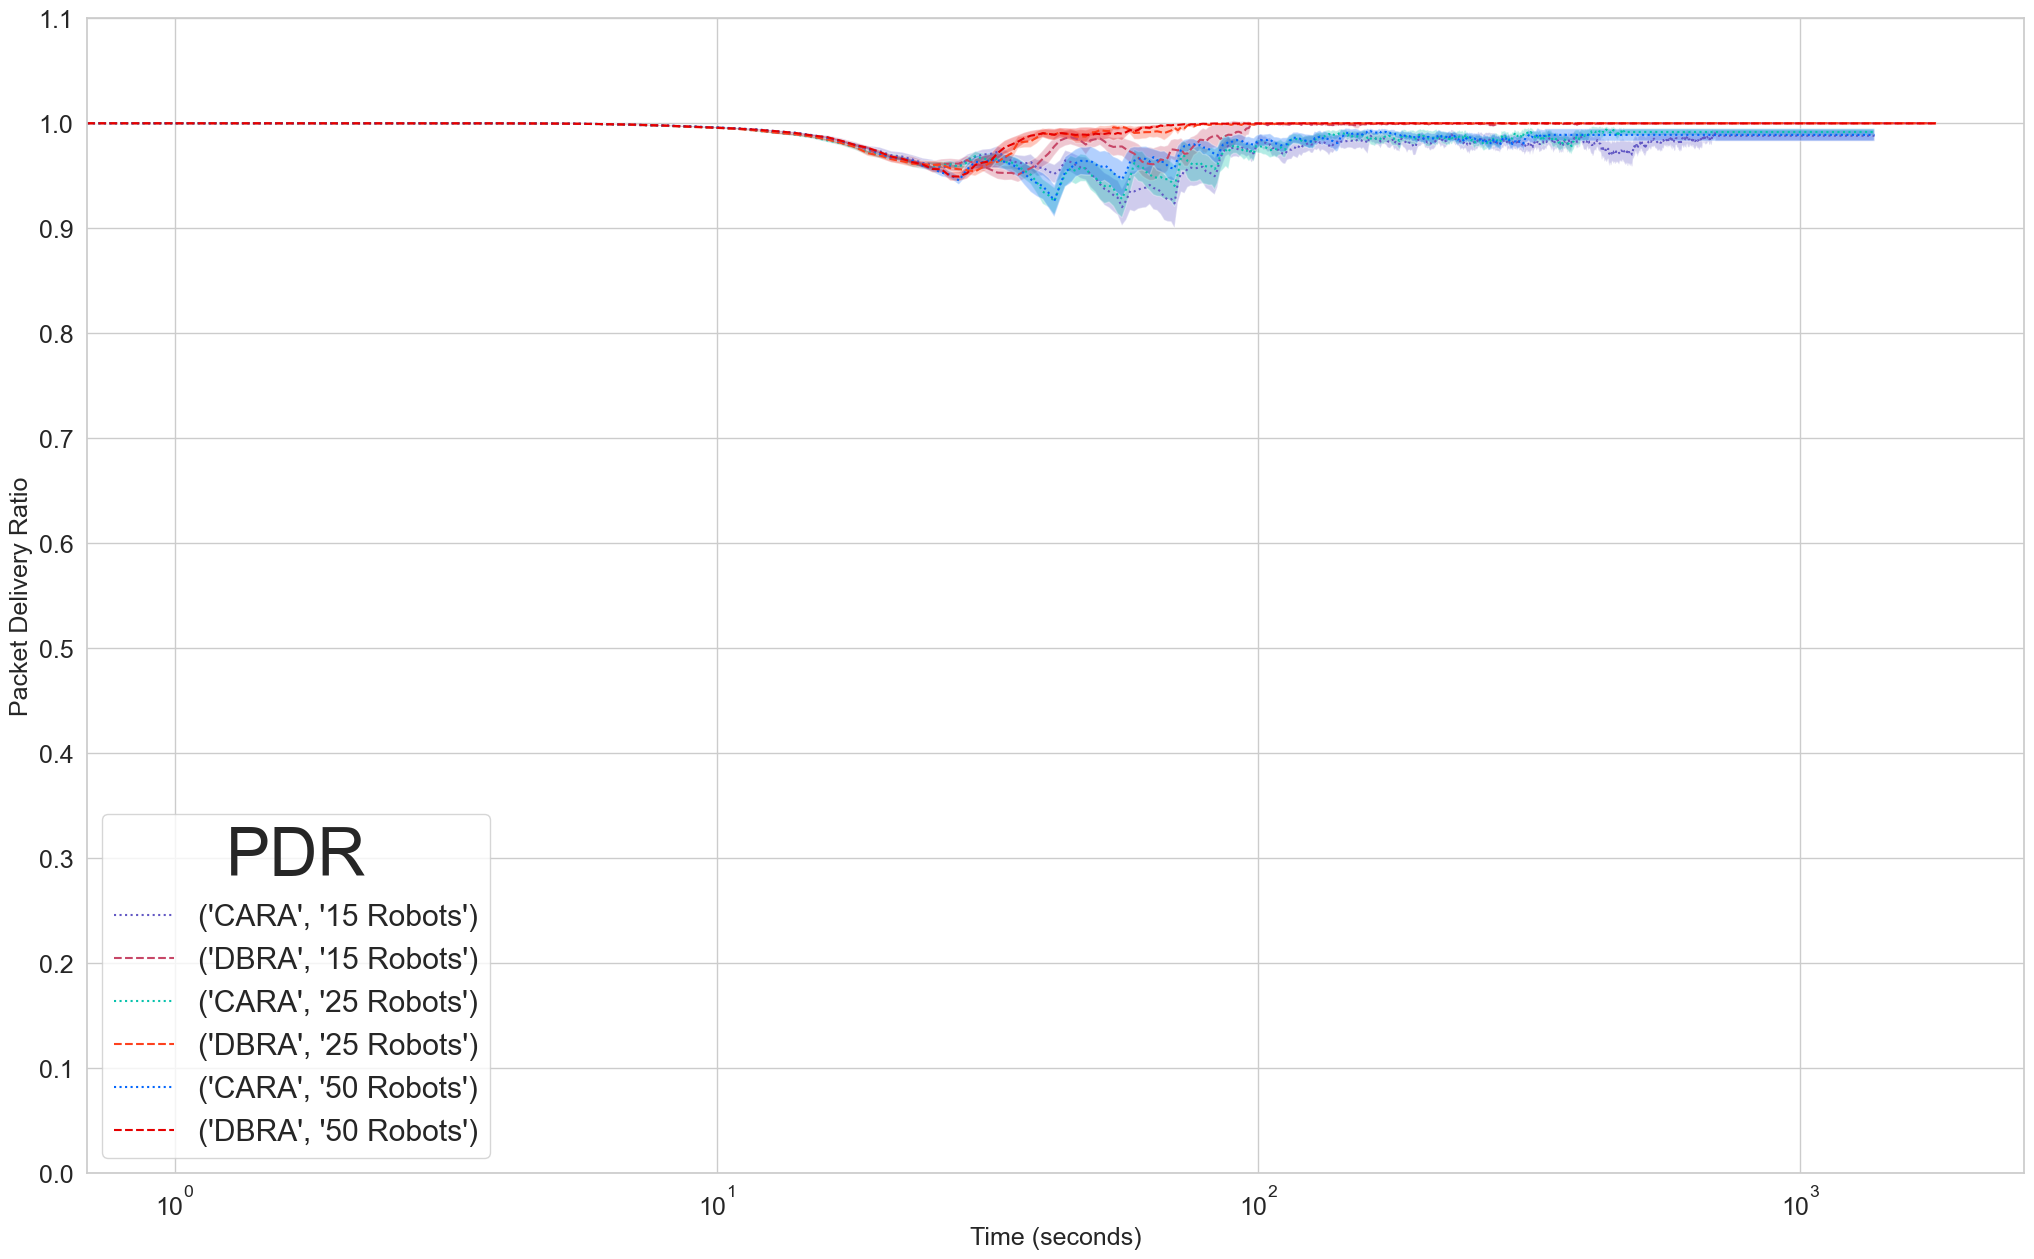

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped


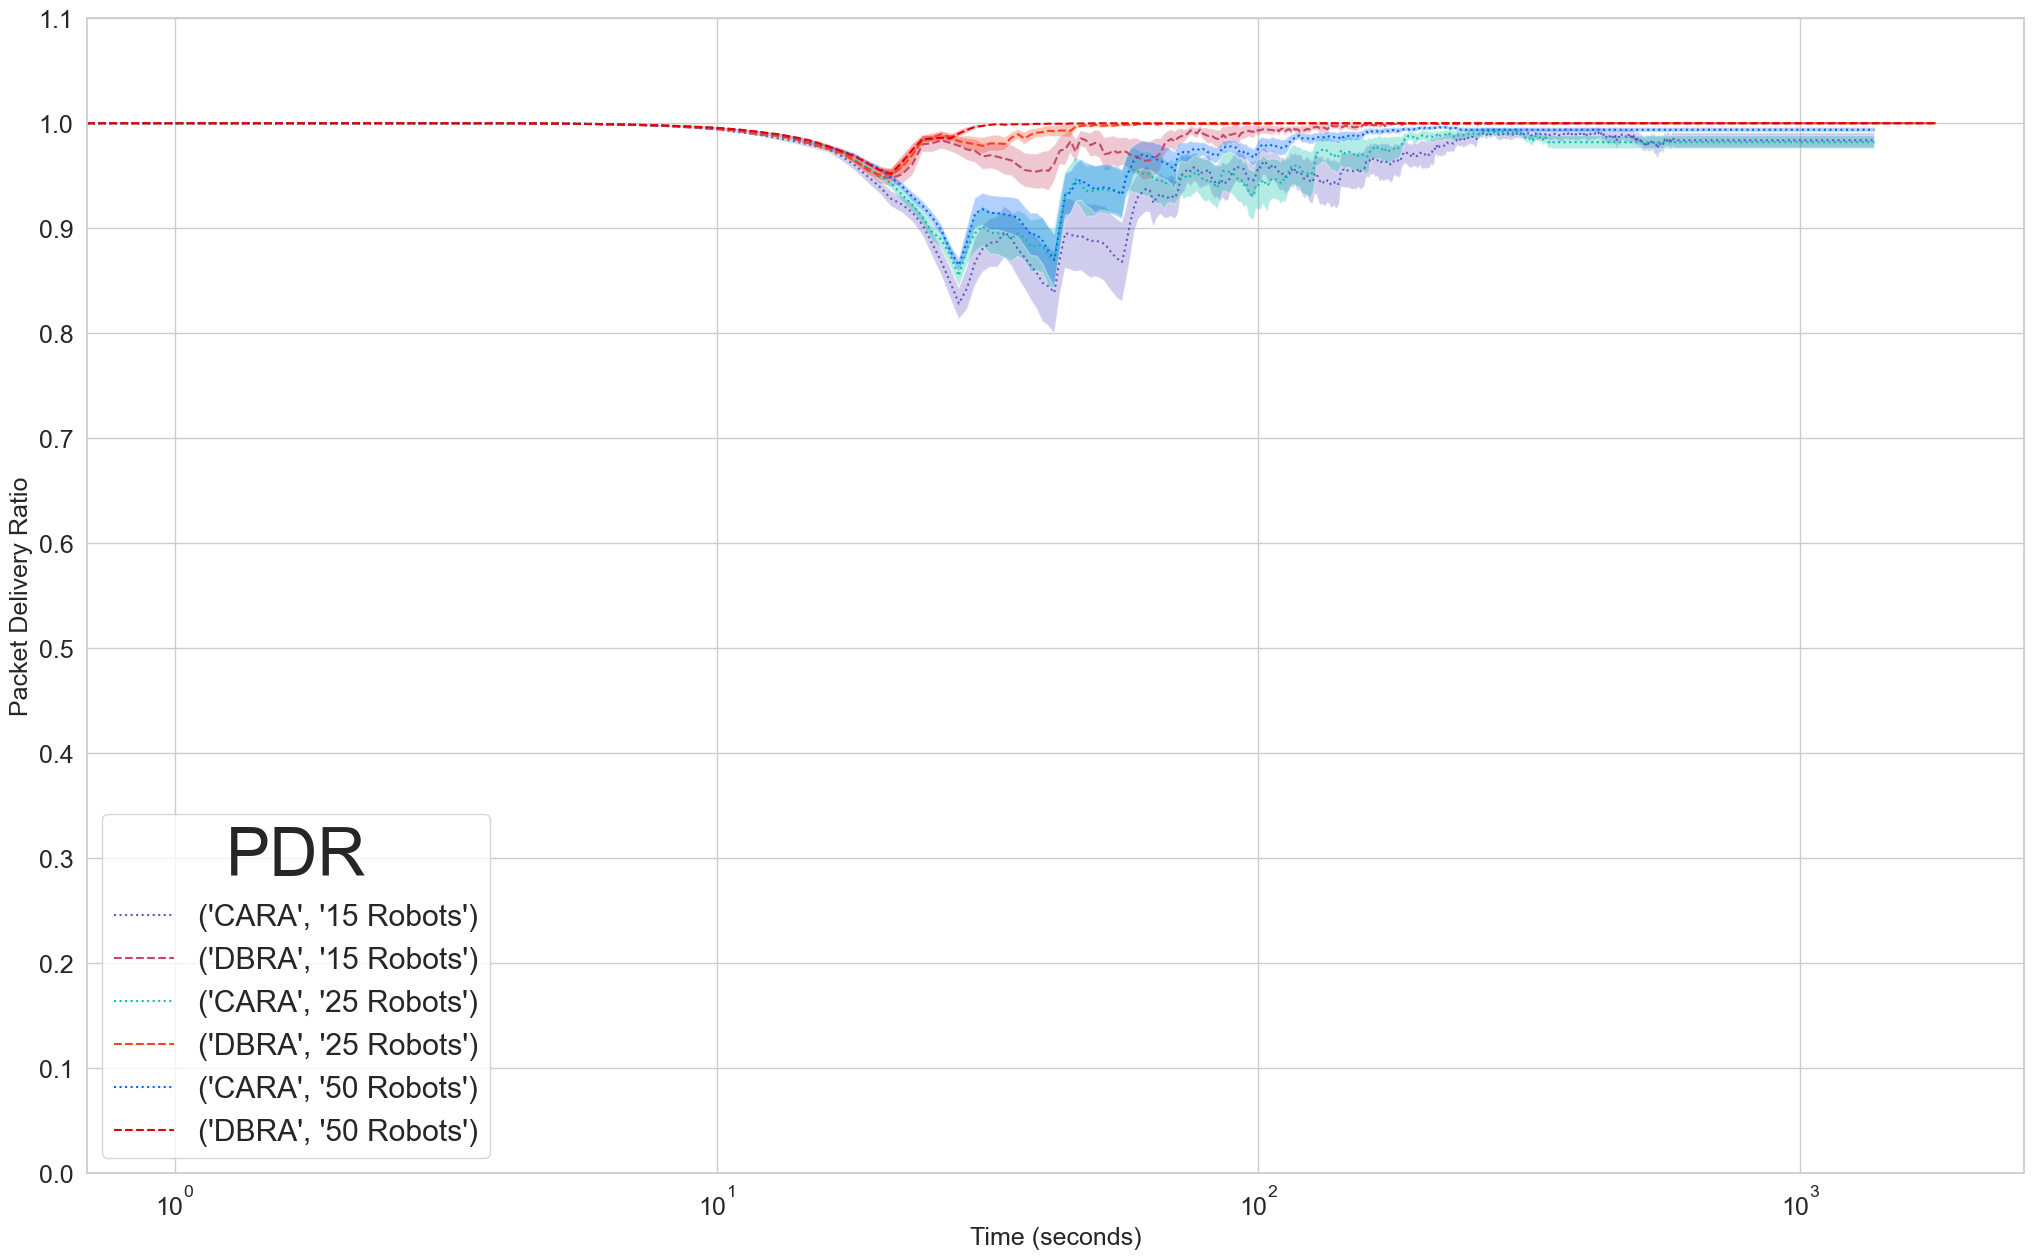

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped


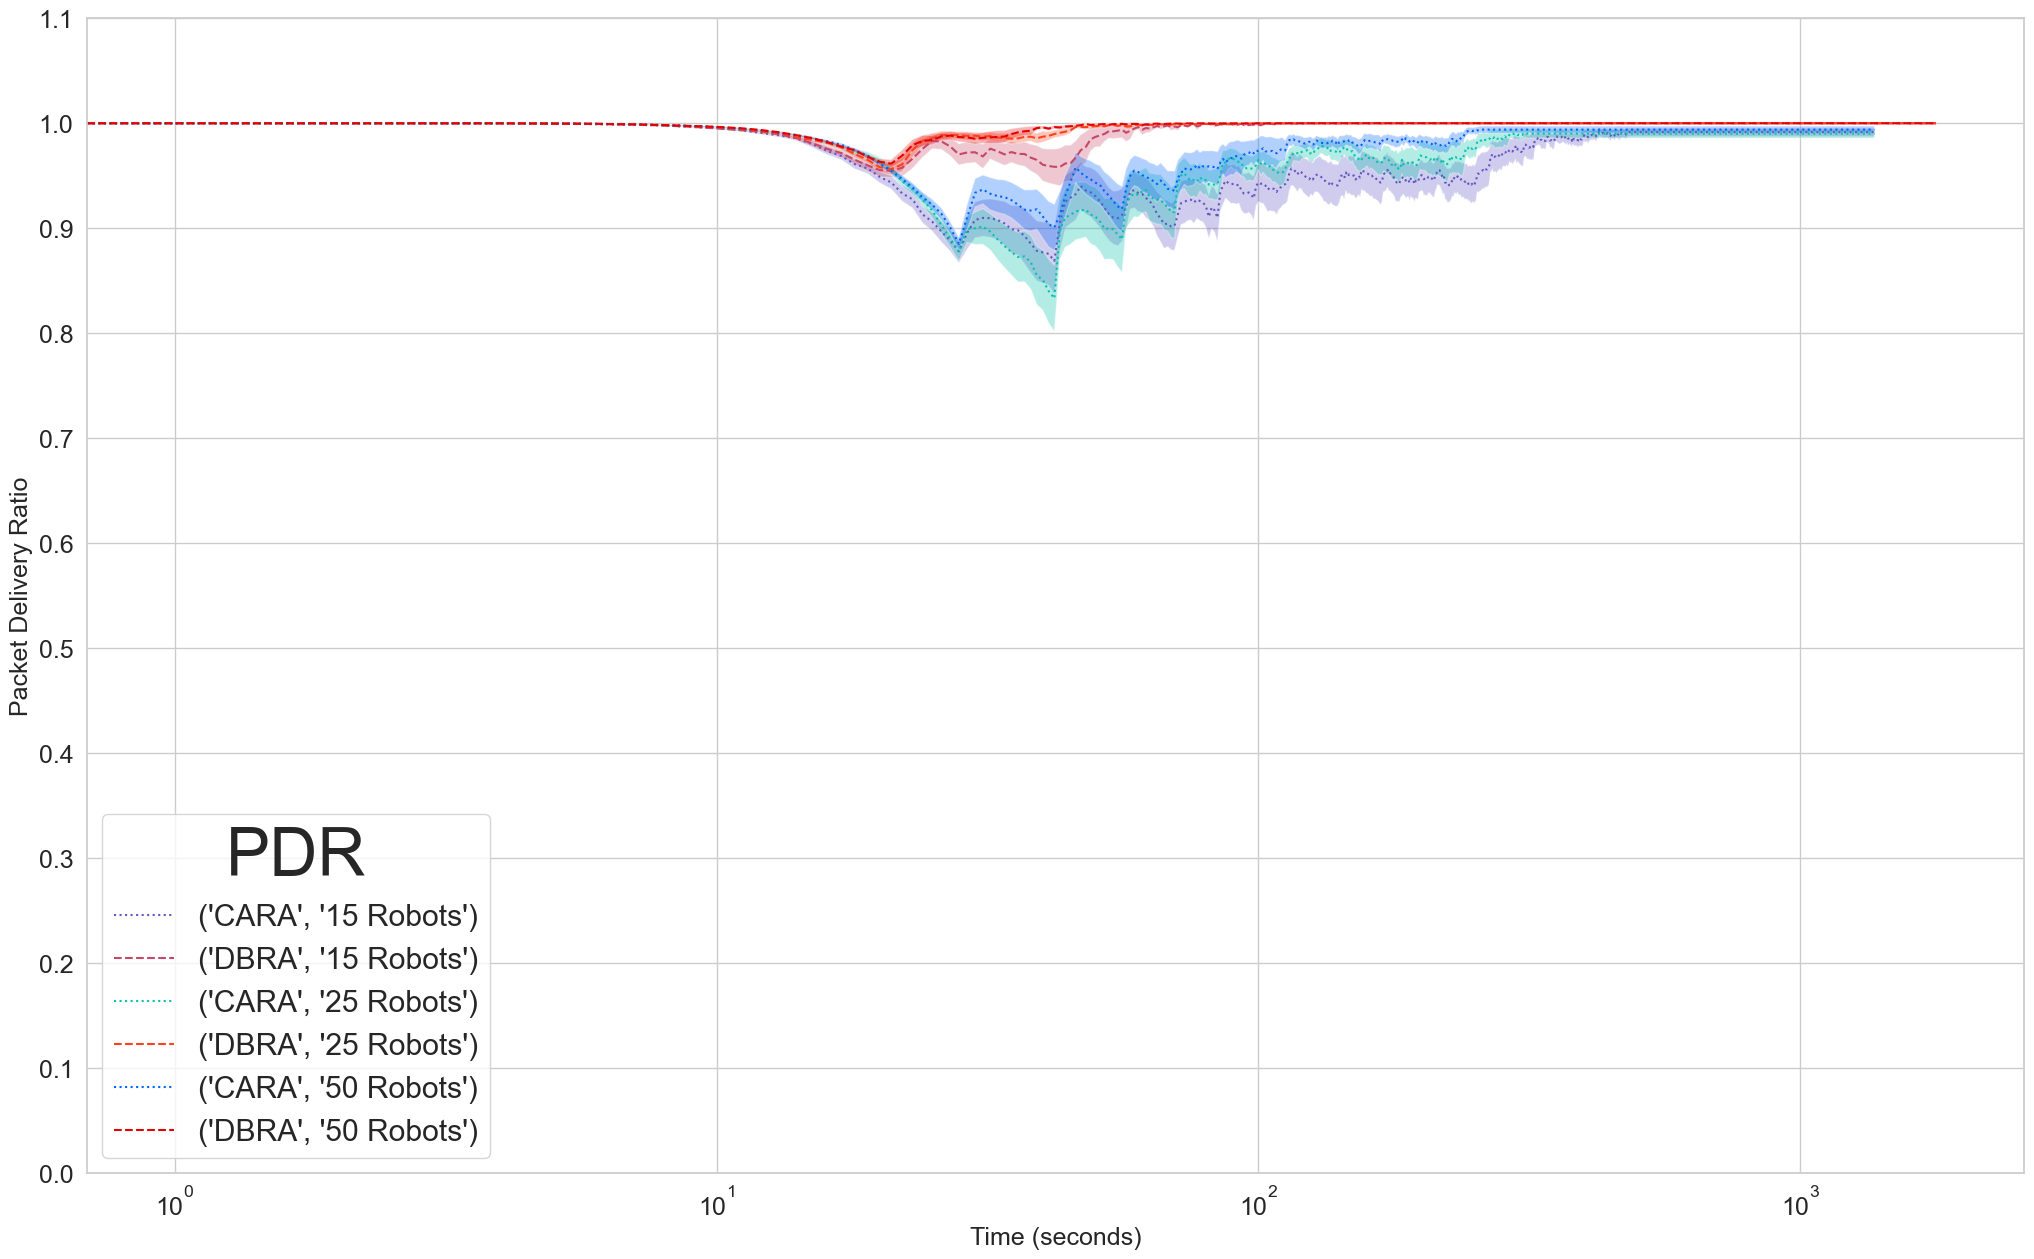

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped


In [7]:
#============ Plot Average PDR Vs. Time 
import math

plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [25, 15]

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# format -> data = {seed1: {config: {....}}, PDRs: [[1,1,1,1], [1,1,1,1], ...], numOfRelays: [0, 1,2, ..]},
#                   seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines       = [json.loads(l) for l in f]
    PDRs        = []
    numOfRelays = []
    time        = []
    for line in lines:
        if line["type"] == "simSetting":
            numRobots       = line['simSetting']['numRobots'] 
            floorplan       = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            
        
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())) :
            PDRs         += [sum(line['PDRs'])/len(line['PDRs'])]
            numOfRelays  += [line['numOfRelays']]
            time         += [line['time']]
 
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "PDRs":            PDRs,
         "numOfRelays":     numOfRelays,
         "time":            time,
        }
    ]

floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()

for floorplan in floorplans:
    (fig,ax)    = plt.subplots()
    lines       = {}
    linesfill   = {}
    for value in numRobots:
        toPlot = {}
        for relayAlgorithm in relayAlgorithms:
            toPlot[value]   = {"mean": [], "yerr": [], "y1err": [], "y2err": []}
            timelines       = [d['time'] for d in data if d['relayAlgorithm']==relayAlgorithm]        
            maxtime         = max([t[-1] for t in timelines])
            
            for i in range(int(maxtime)):
                try:
                    (m, h) = mean_confidence_interval(
                        [
                         d["PDRs"][i] for d in data            if 
                         d['numRobots']      == value          and 
                         d['floorplan']      == floorplan      and 
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )
                except:
                    pass

                toPlot[value]["mean"]    += [m]
                toPlot[value]["yerr"]    += [h]
                toPlot[value]["y1err"]   += [m-h]
                toPlot[value]["y2err"]   += [m+h]
            y                             = toPlot[value]["mean"]
            x                             = np.arange(0, len(y))
            yerr                          = toPlot[value]["yerr"]
            lines[(floorplan, value)]     = ax.errorbar(x, y, ecolor="gainsboro", linestyle=linestyles[relayAlgorithm],color=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            linesfill[(floorplan, value)] = ax.fill_between(x, toPlot[value]["y1err"], toPlot[value]["y2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
    
    #convert x-axis to Logarithmic scale
    ax.grid(True)
    plt.xscale("log")
    plt.xlabel("Time (seconds)")
    ax.set_yticks(np.arange(0, 1.2, 0.1))
    plt.ylabel("Packet Delivery Ratio")
    plt.legend(title="PDR",fontsize='large', fancybox=True)
    alllines     = lines
    alllinesfill = linesfill
    plt.show()
    fig.savefig(os.path.join('logs','avgPDR_{0}.eps'.format(floorplan)),bbox_inches='tight')
    
            


['office_small', 'empty_small', 'factory_small']


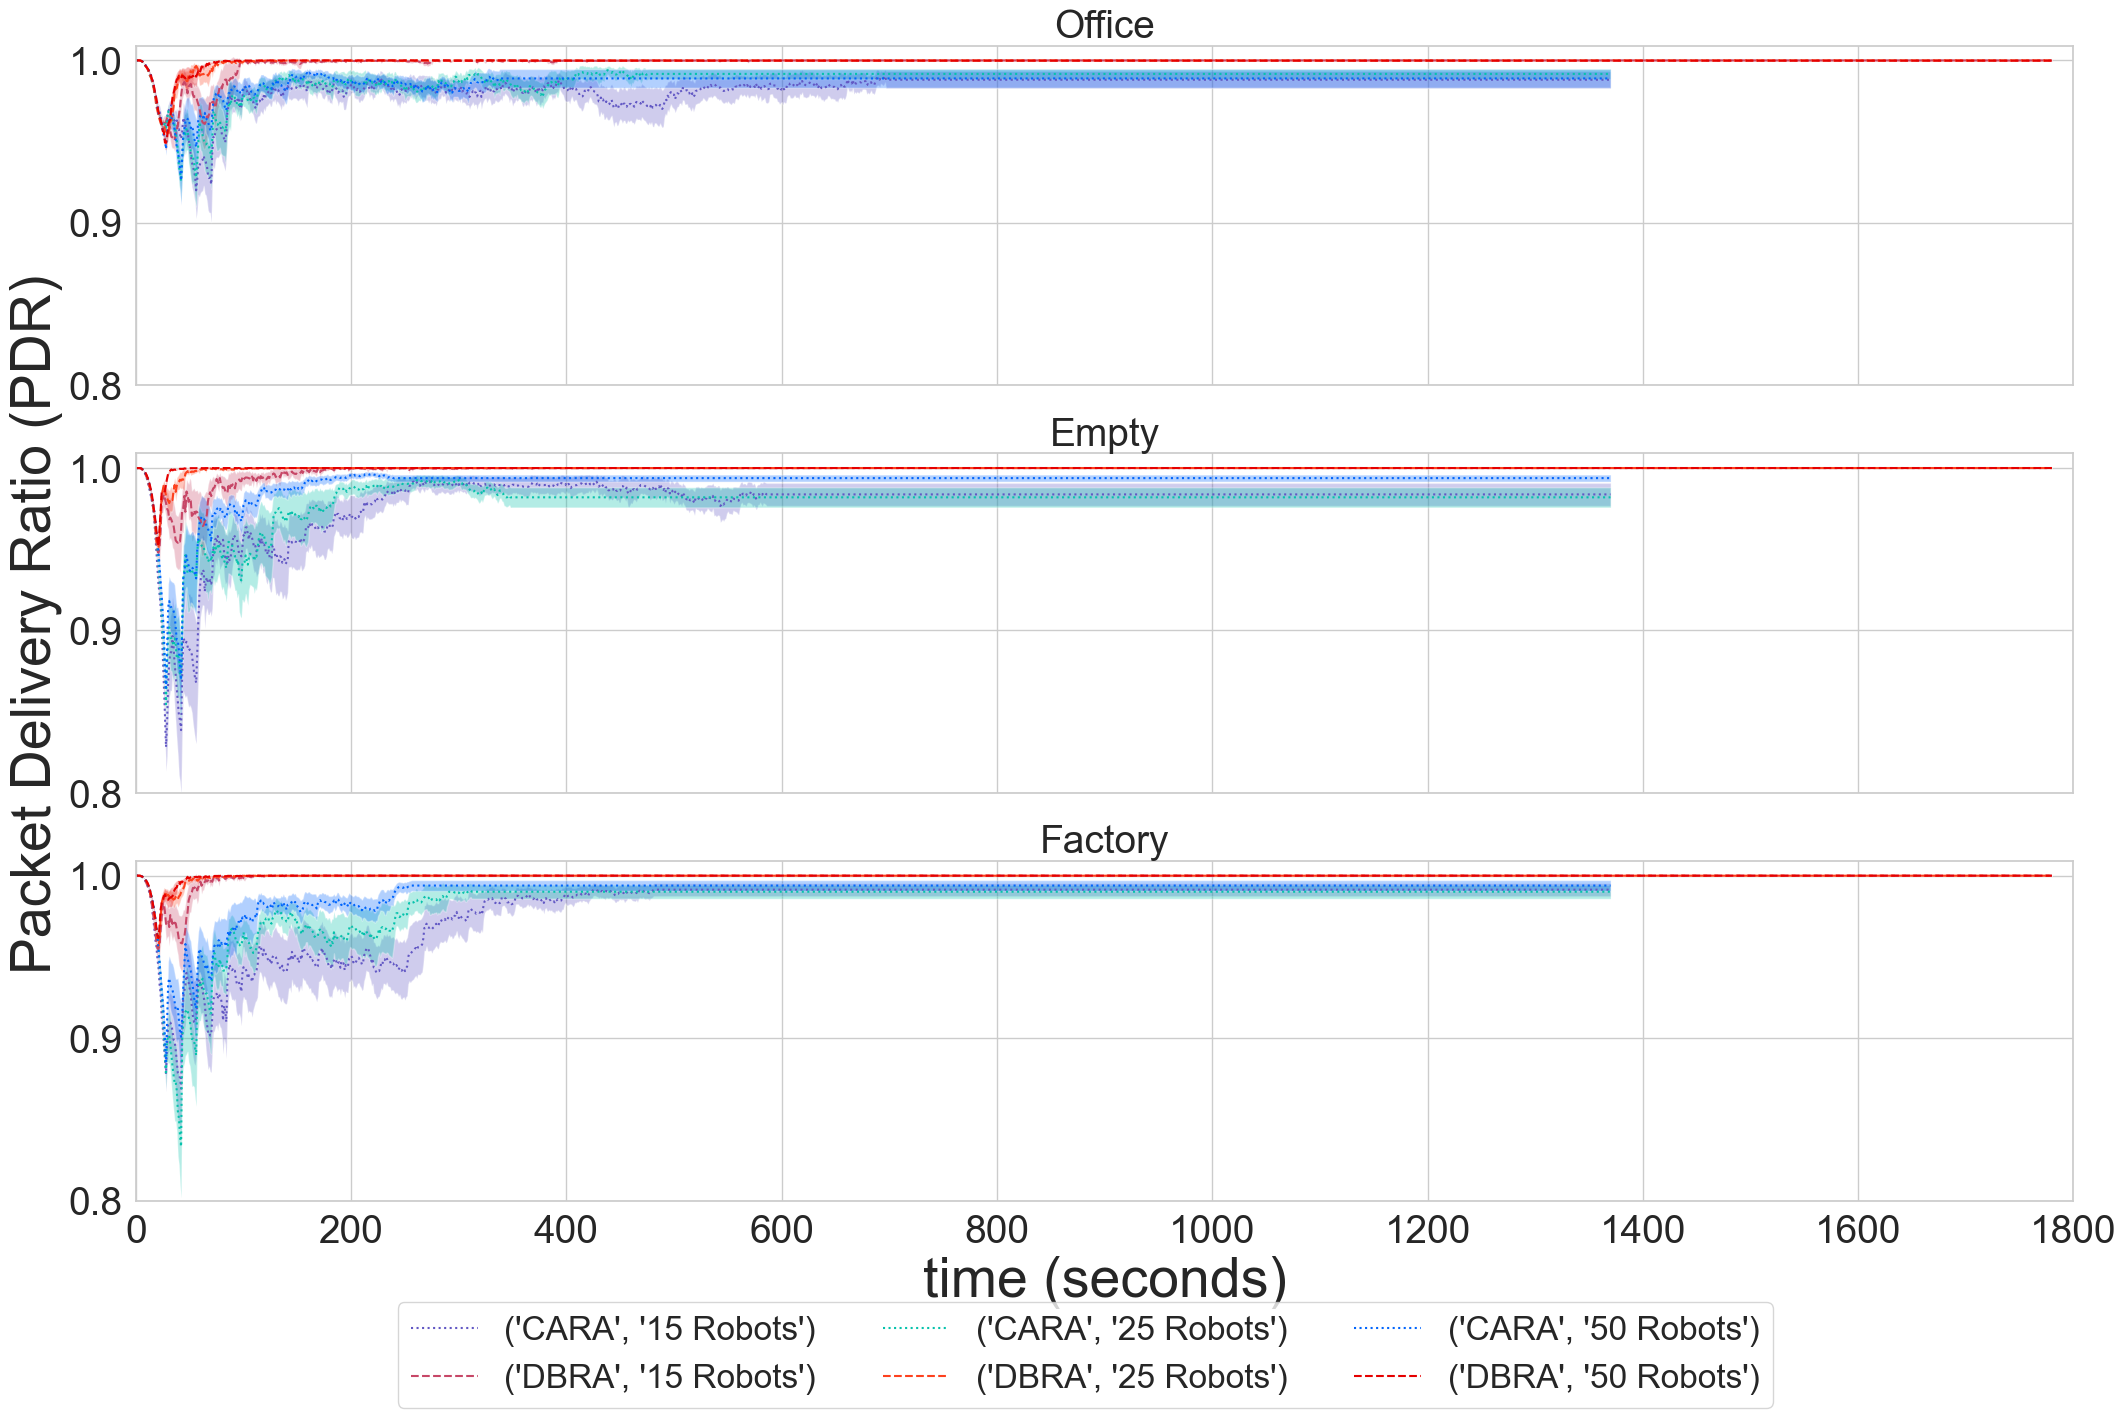

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


In [23]:
# split plots
import math
plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [25, 15]
SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 28
plt.rc('font', size=40)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# format -> data = {seed1: {config: {....}}, PDRs: [[1,1,1,1], [1,1,1,1], ...], numOfRelays: [0, 1,2, ..]},
#                   seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines       = [json.loads(l) for l in f]
    PDRs        = []
    numOfRelays = []
    time        = []
    for line in lines:
        if line["type"] == "simSetting":
            numRobots       = line['simSetting']['numRobots']
            floorplan       = line['simSetting']['floorplan']
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())) :
            PDRs         += [sum(line['PDRs'])/len(line['PDRs'])]
            numOfRelays  += [line['numOfRelays']]
            time         += [line['time']]
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "PDRs":            PDRs,
         "numOfRelays":     numOfRelays,
         "time":            time,
        }
    ]
floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()

fig, axs = plt.subplots(nrows= 3, ncols=1, sharex=True)

for idx, floorplan in enumerate(floorplans):
    ax          = axs[idx]
    lines       = {}
    linesfill   = {}
    for value in numRobots:
        toPlot = {}
        for relayAlgorithm in relayAlgorithms:
            toPlot[value]   = {"mean": [], "yerr": [], "y1err": [], "y2err": []}
            timelines       = [d['time'] for d in data if d['relayAlgorithm']==relayAlgorithm]
            maxtime         = max([t[-1] for t in timelines])
            for i in range(int(maxtime)):
                try:
                    (m, h) = mean_confidence_interval(
                        [
                         d["PDRs"][i] for d in data            if
                         d['numRobots']      == value          and
                         d['floorplan']      == floorplan      and
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )
                except:
                    pass
                toPlot[value]["mean"]    += [m]
                toPlot[value]["yerr"]    += [h]
                toPlot[value]["y1err"]   += [m-h]
                toPlot[value]["y2err"]   += [m+h]
            y                             = toPlot[value]["mean"]
            x                             = np.arange(0, len(y))
            yerr                          = toPlot[value]["yerr"]
            lines[(floorplan, value)]     = ax.errorbar(x, y, ecolor="gainsboro", linestyle=linestyles[relayAlgorithm],color=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            linesfill[(floorplan, value)] = ax.fill_between(x, toPlot[value]["y1err"], toPlot[value]["y2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
    #convert x-axis to Logarithmic scale
    ax.grid(True)
    # plt.xscale("log")
    # plt.xlabel("Time (seconds)")
    ax.set_yticks(np.arange(0, 1.2, 0.1))
    # plt.ylabel("Packet Delivery Ratio")
    # plt.legend(title="PDR",fontsize='large', fancybox=True)
    alllines     = lines
    alllinesfill = linesfill
    # Set vertical limits of the plots
    #ax.set(ylim = (0.7999, 1.009), xlim = (0, 750))
    ax.set(ylim = (0.7999, 1.009), xlim = (0, 1800))
    ax.set_title("Packet Delivery Ratio 0")

#plt.xscale("log")
plt.xlabel("time (seconds)")
print(floorplans)
axs[1].set_ylabel("Packet Delivery Ratio (PDR)")
axs[0].set_title("Office")
axs[1].set_title("Empty")
axs[2].set_title("Factory")

plt.legend(fancybox=True, ncol=3, bbox_to_anchor=(0.49,-0.25), loc="upper center")
plt.show()
fig.savefig(os.path.join('logs','avgPDR_all.eps'),bbox_inches='tight')
fig.savefig(os.path.join('logs','avgPDR_all.pdf'),bbox_inches='tight')

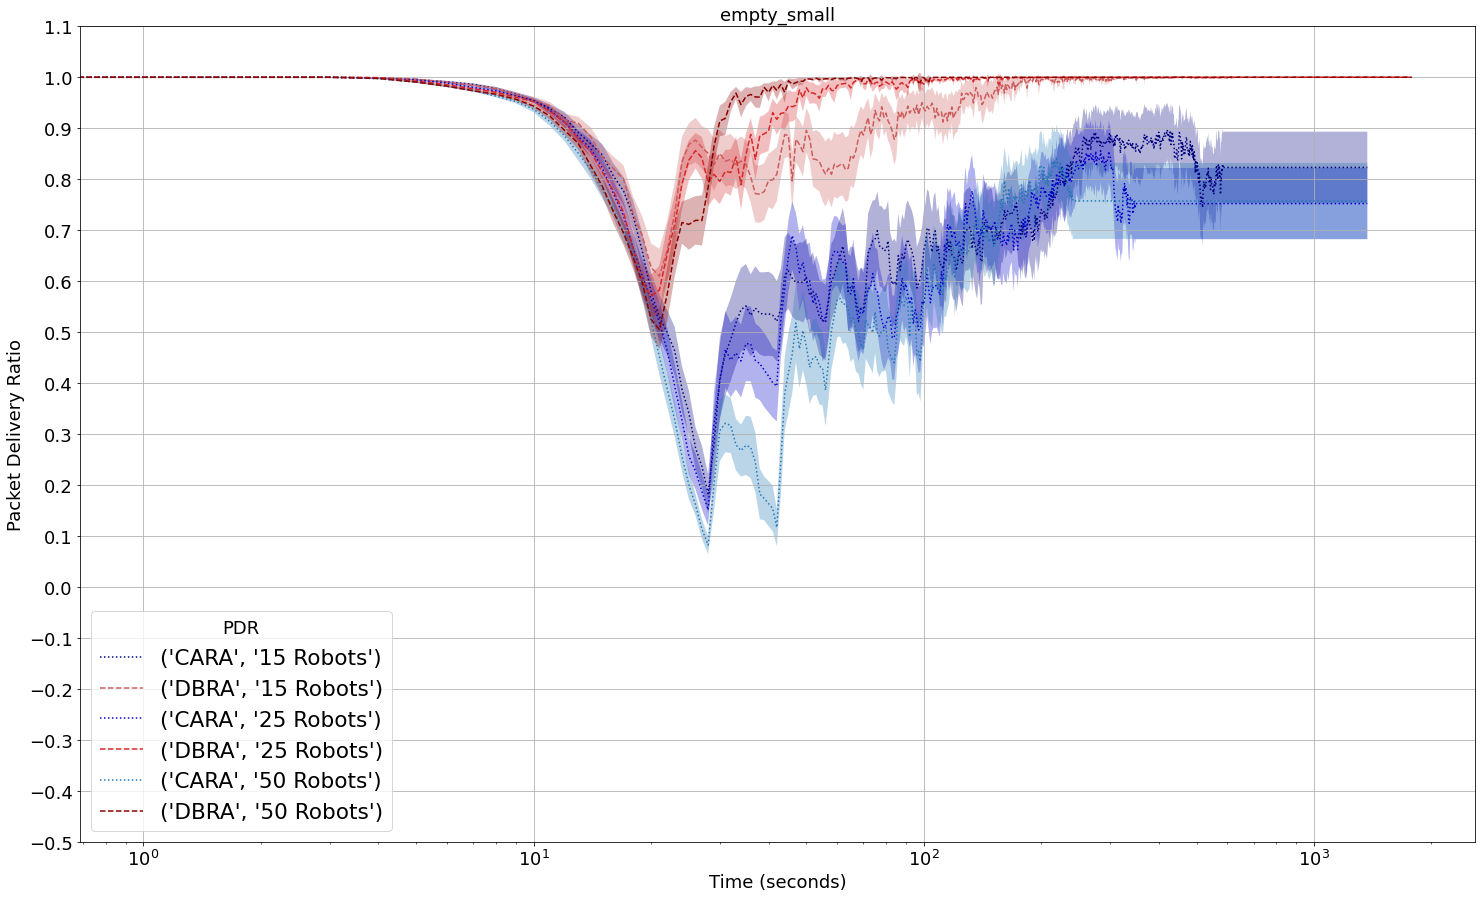

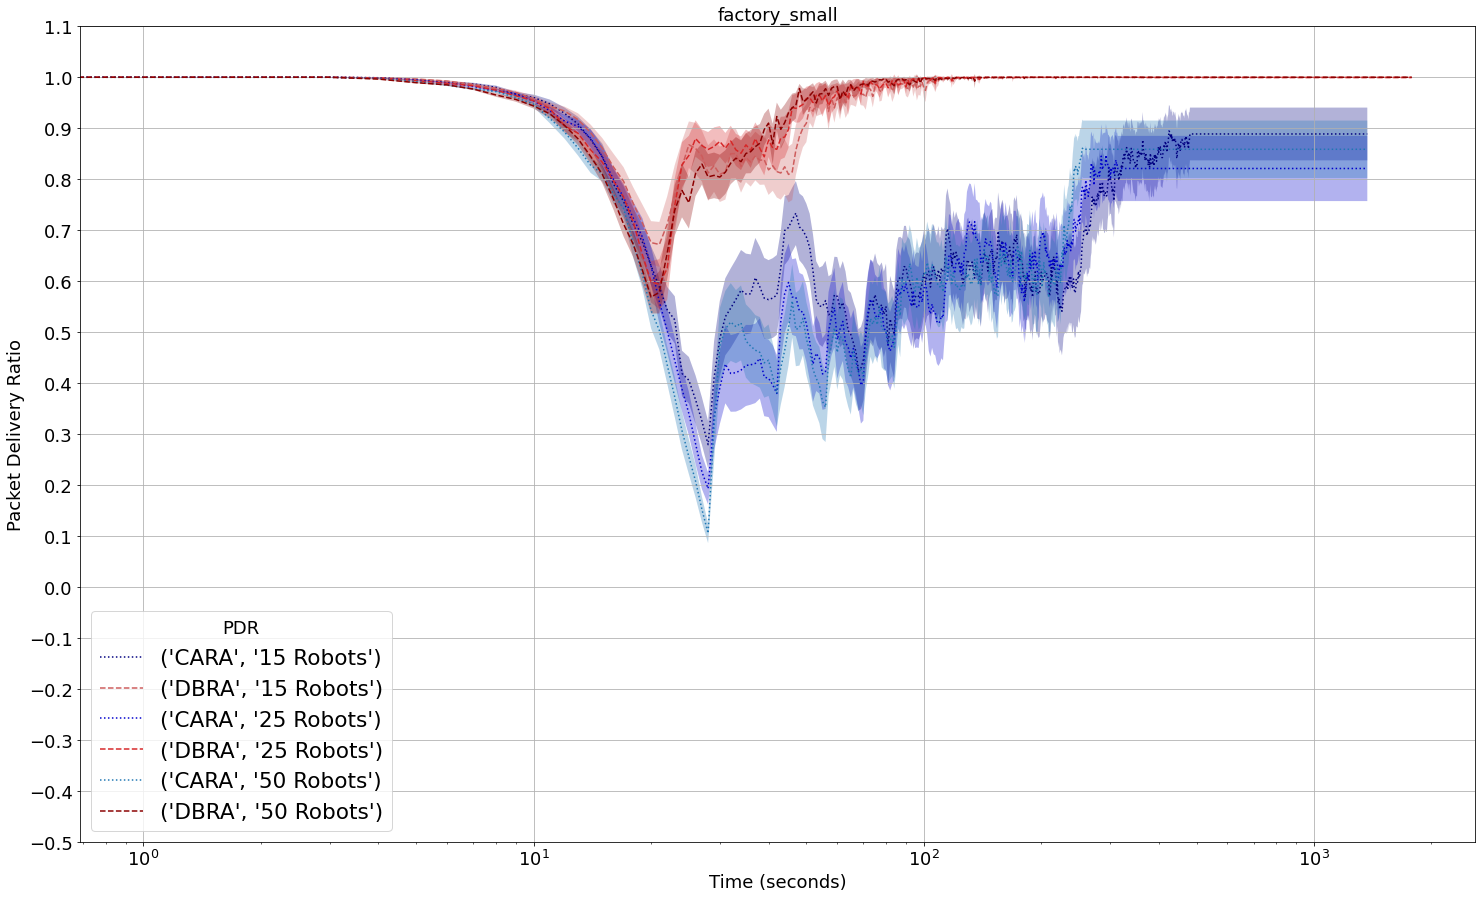

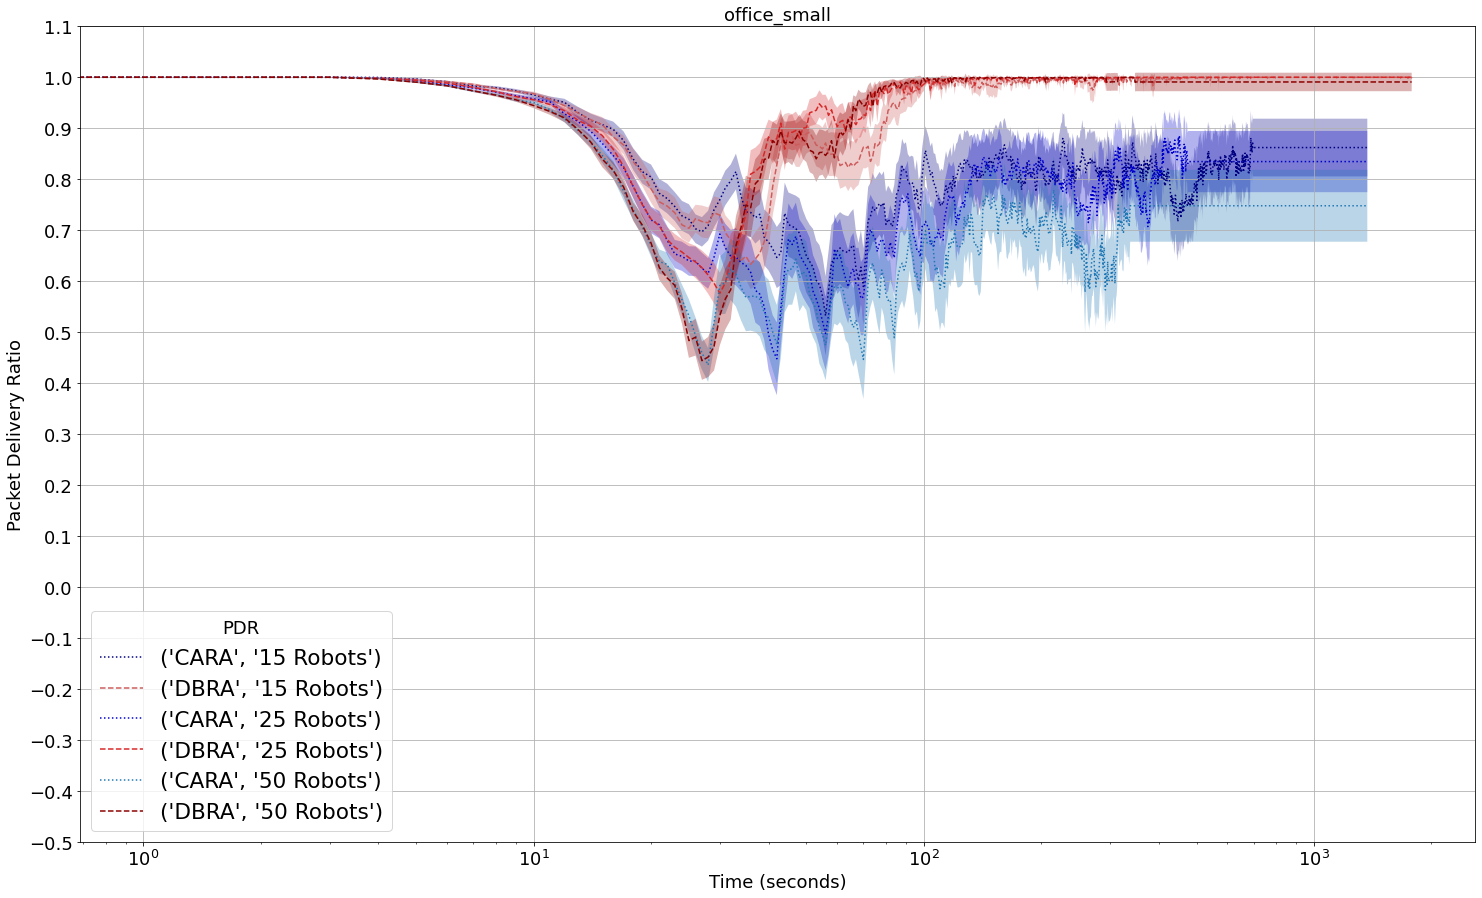

In [106]:
#============ Plot minimum PDR Vs. Time
import math

plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [25, 15]

# format -> data = {seed1: {config: {....}}, PDRs: [[1,1,1,1], [1,1,1,1], ...], numOfRelays: [0, 1,2, ..]},
#                   seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines       = [json.loads(l) for l in f]
    PDRs        = []
    numOfRelays = []
    time        = []
    for line in lines:
        if line["type"] == "simSetting":
            numRobots       = line['simSetting']['numRobots'] 
            floorplan       = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            
        
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())):
            PDRs         += [min(line['PDRs'])]
            numOfRelays  += [line['numOfRelays']]
            time         += [line['time']]
 
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "PDRs":            PDRs,
         "numOfRelays":     numOfRelays,
         "time":            time,
        }
    ]

floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()

for floorplan in floorplans:
    print(floorplan)
    (fig,ax)    = plt.subplots()
    lines       = {}
    linesfill   = {}
    for value in numRobots:
        toPlot = {}
        for relayAlgorithm in relayAlgorithms:
            toPlot[value]   = {"mean": [], "yerr": [], "y1err": [], "y2err": []}
            timelines       = [d['time'] for d in data if d['relayAlgorithm']==relayAlgorithm]        
            maxtime         = max([t[-1] for t in timelines])
            
            for i in range(int(maxtime)):
                try:
                    (m, h) = mean_confidence_interval(
                        [
                         d["PDRs"][i] for d in data            if 
                         d['numRobots']      == value          and 
                         d['floorplan']      == floorplan      and 
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )
                except:
                    pass

                toPlot[value]["mean"]    += [m]
                toPlot[value]["yerr"]    += [h]
                toPlot[value]["y1err"]   += [m-h]
                toPlot[value]["y2err"]   += [m+h]
            y                             = toPlot[value]["mean"]
            x                             = np.arange(0, len(y))
            yerr                          = toPlot[value]["yerr"]
            lines[(floorplan, value)]     = ax.errorbar(x, y, ecolor="gainsboro", linestyle=linestyles[relayAlgorithm],color=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            linesfill[(floorplan, value)] = ax.fill_between(x, toPlot[value]["y1err"], toPlot[value]["y2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
    
    #convert x-axis to Logarithmic scale
    ax.grid(True)
    plt.xscale("log")
    plt.title(f"{floorplan}")
    plt.xlabel("Time (seconds)")
    ax.set_yticks(np.arange(-0.5, 1.2, 0.1))
    plt.ylabel("Packet Delivery Ratio (PDR)")
    plt.legend(title="PDR",fontsize='large', fancybox=True)
    alllines     = lines
    alllinesfill = linesfill
    plt.show()

    

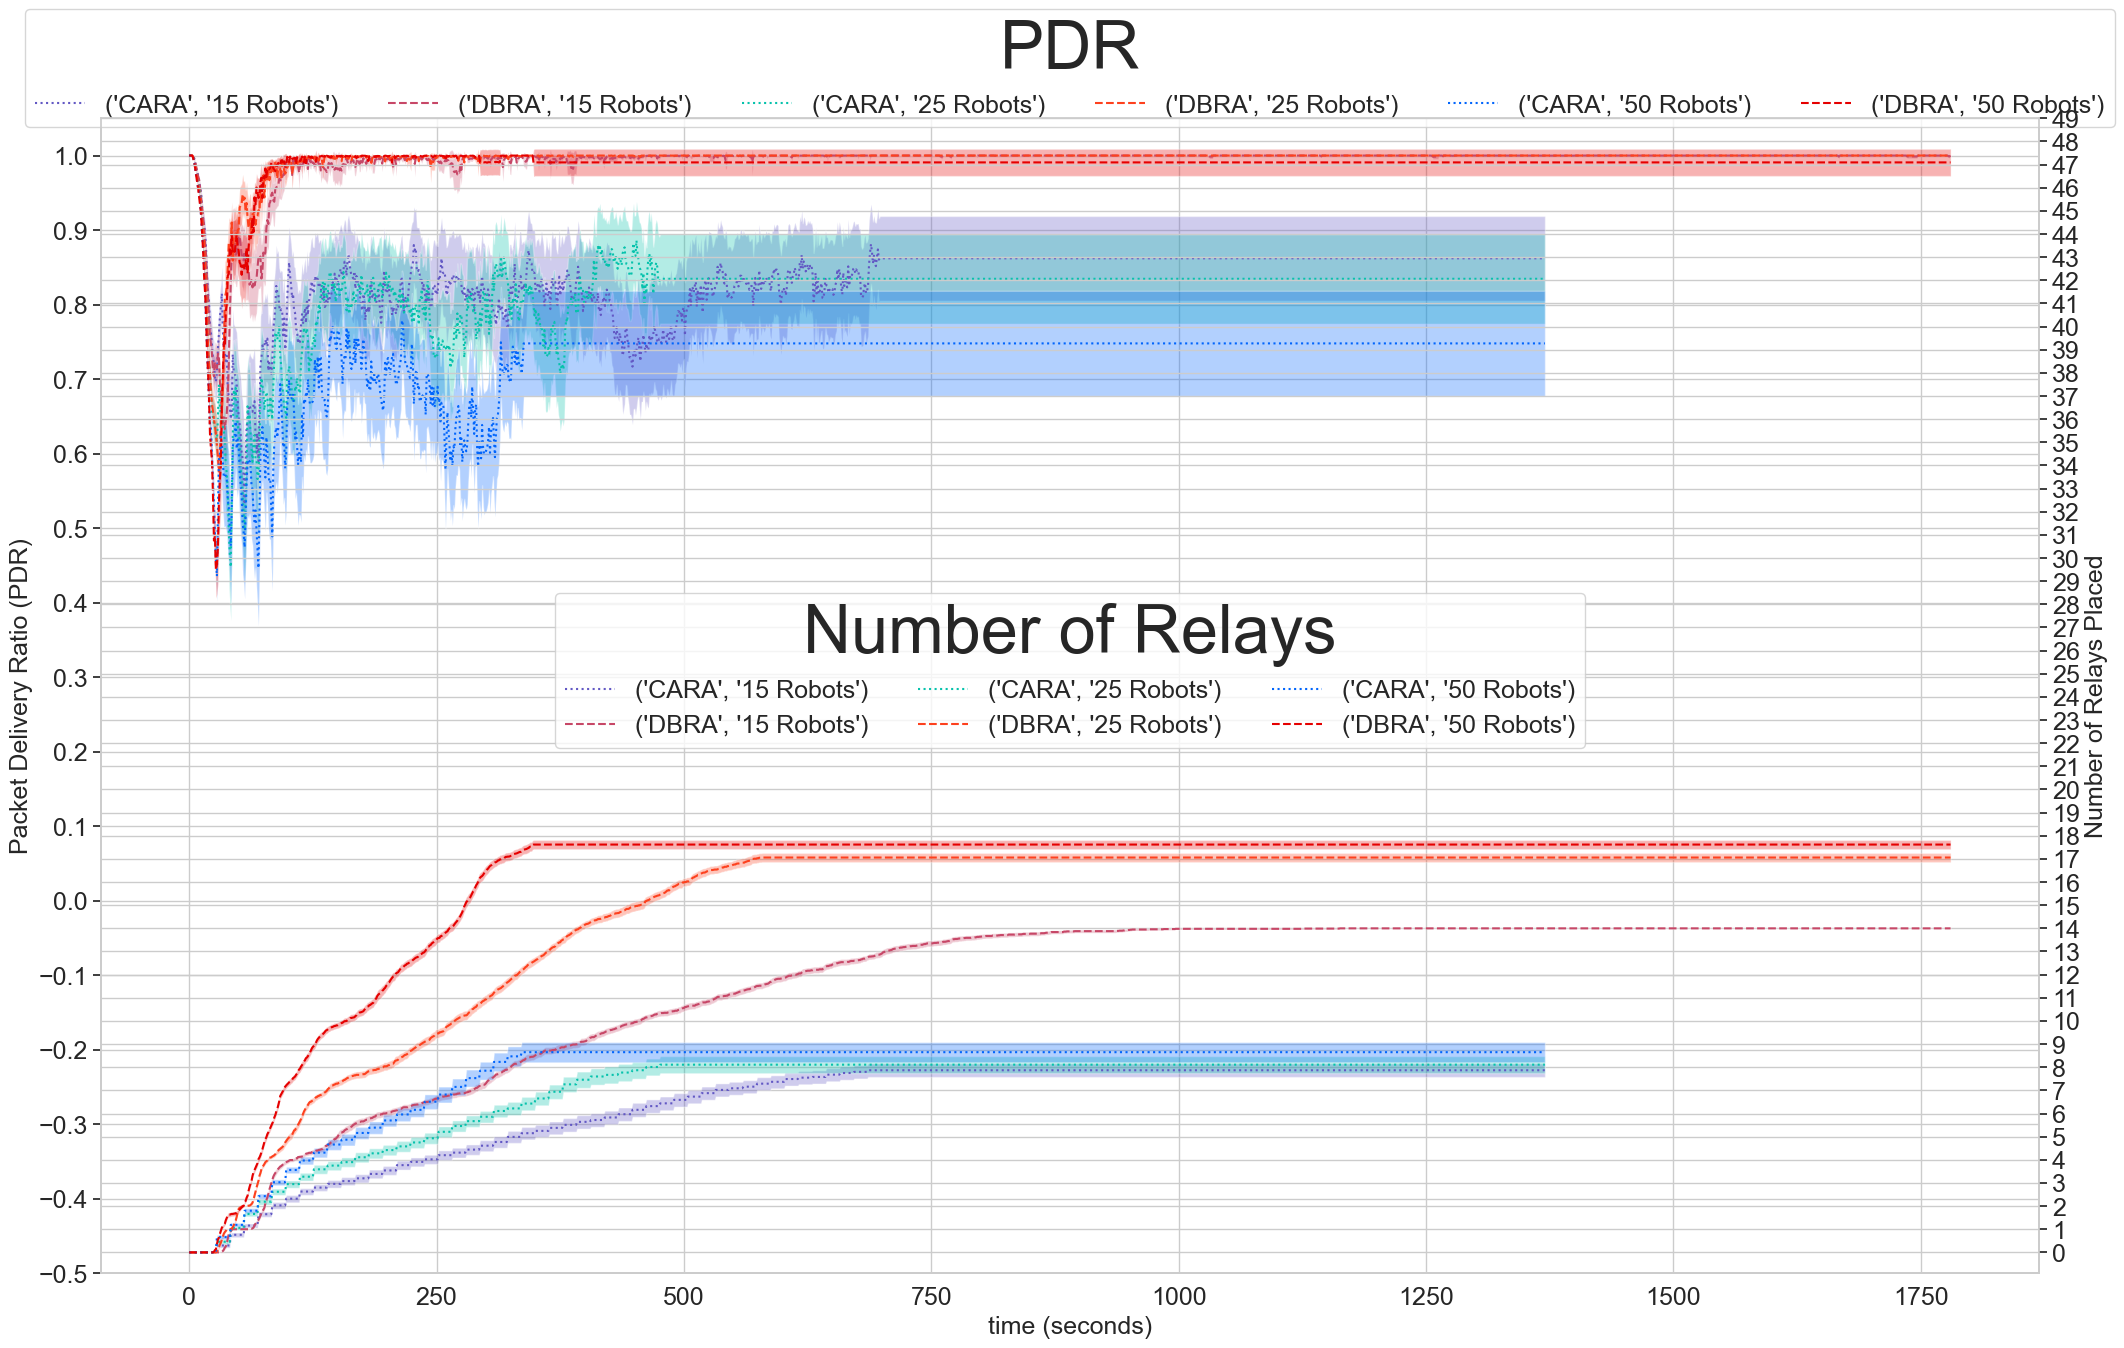

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


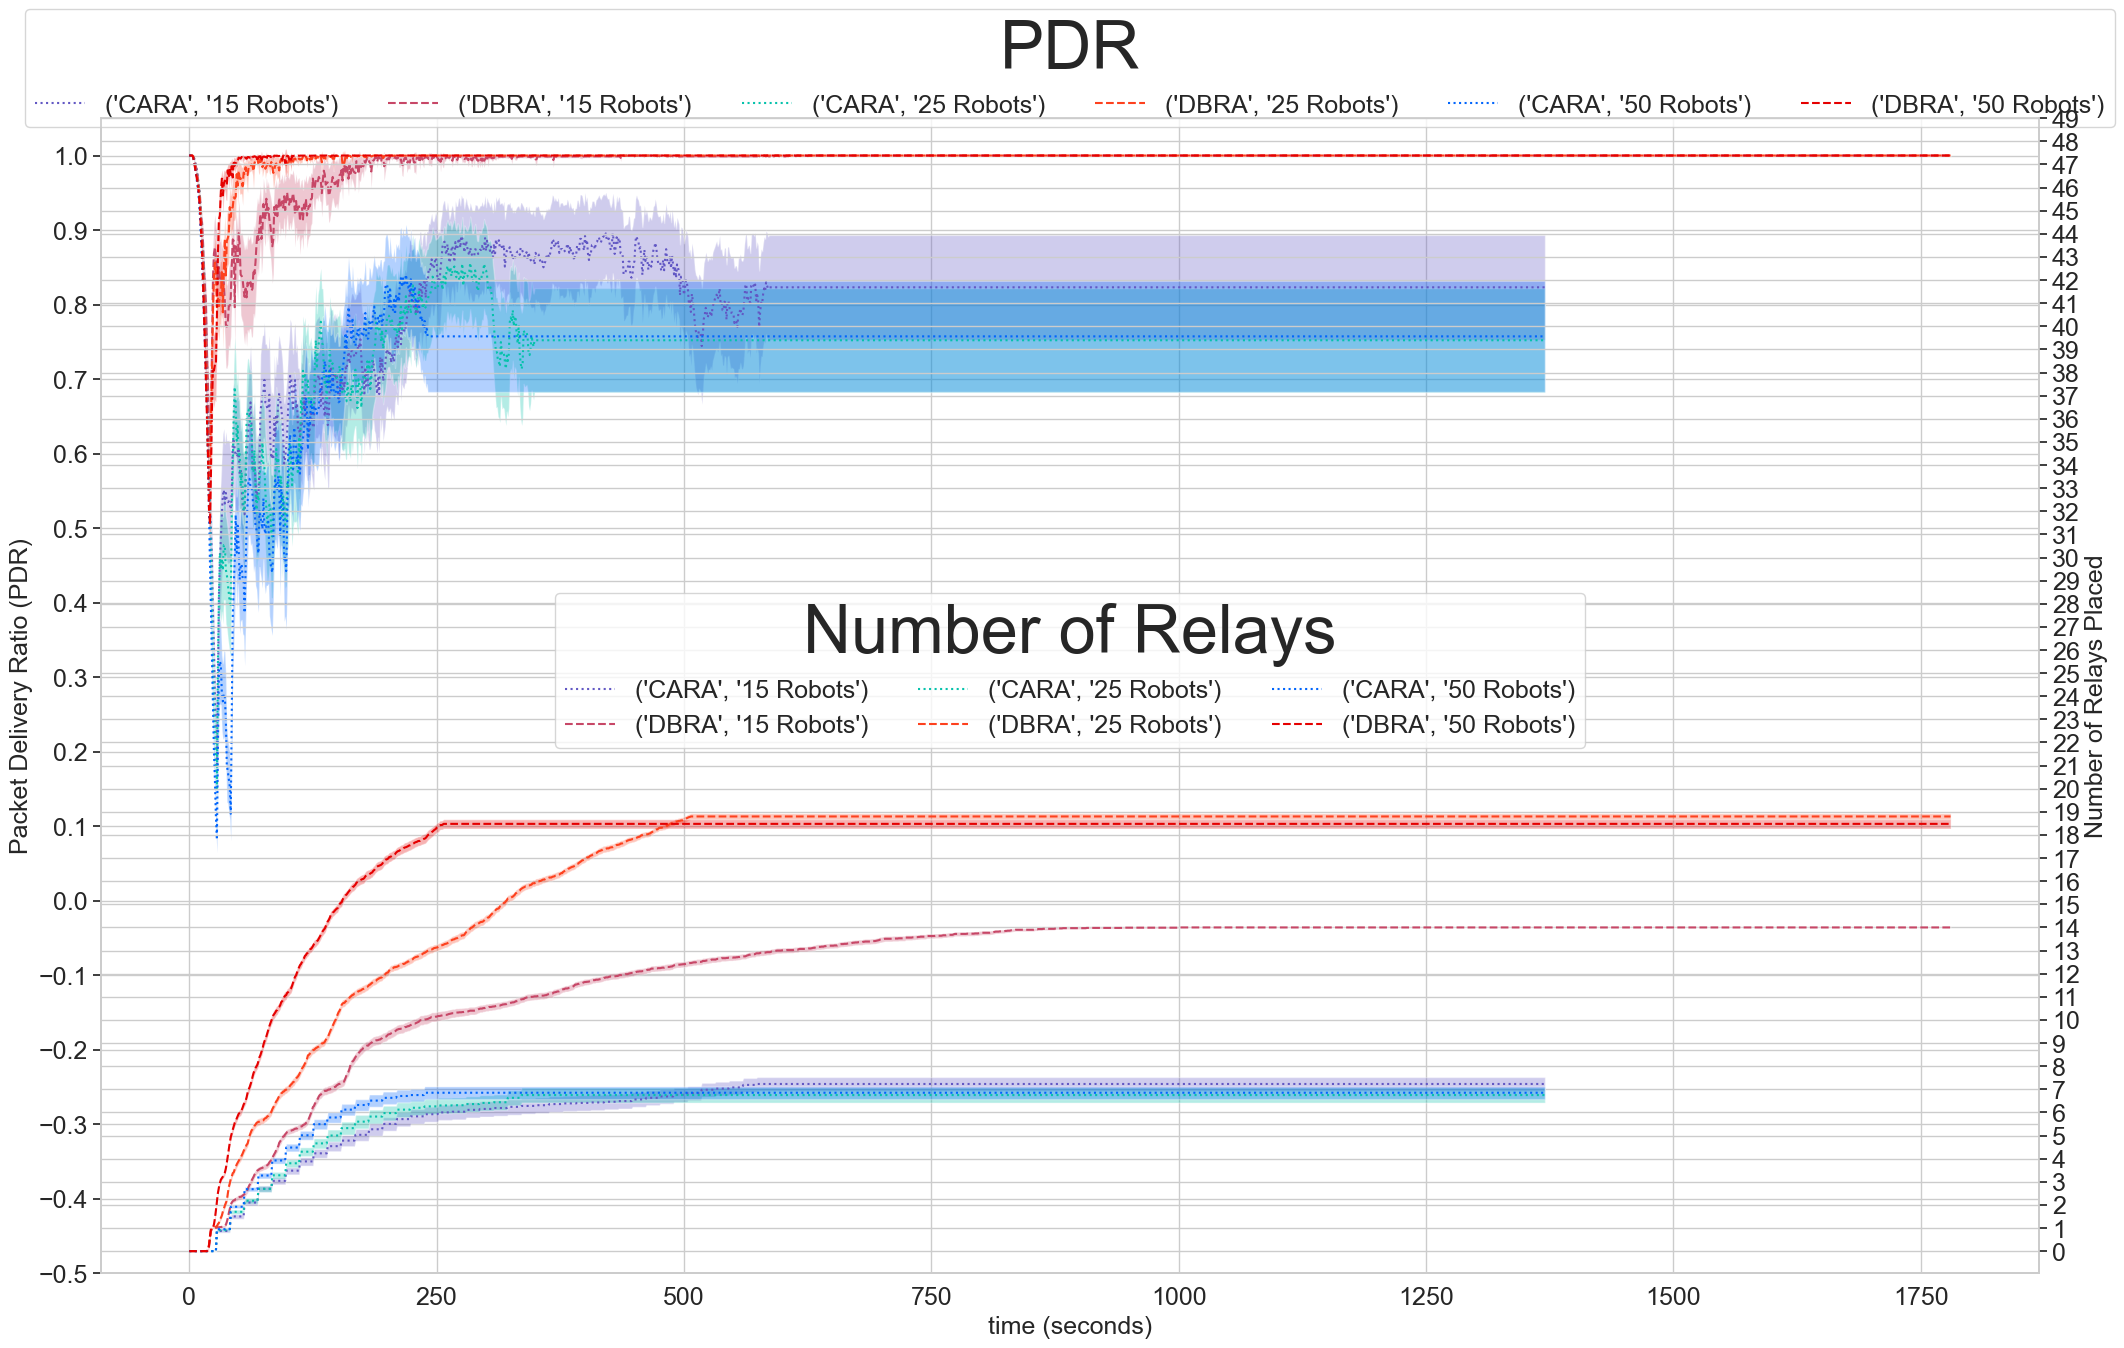

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


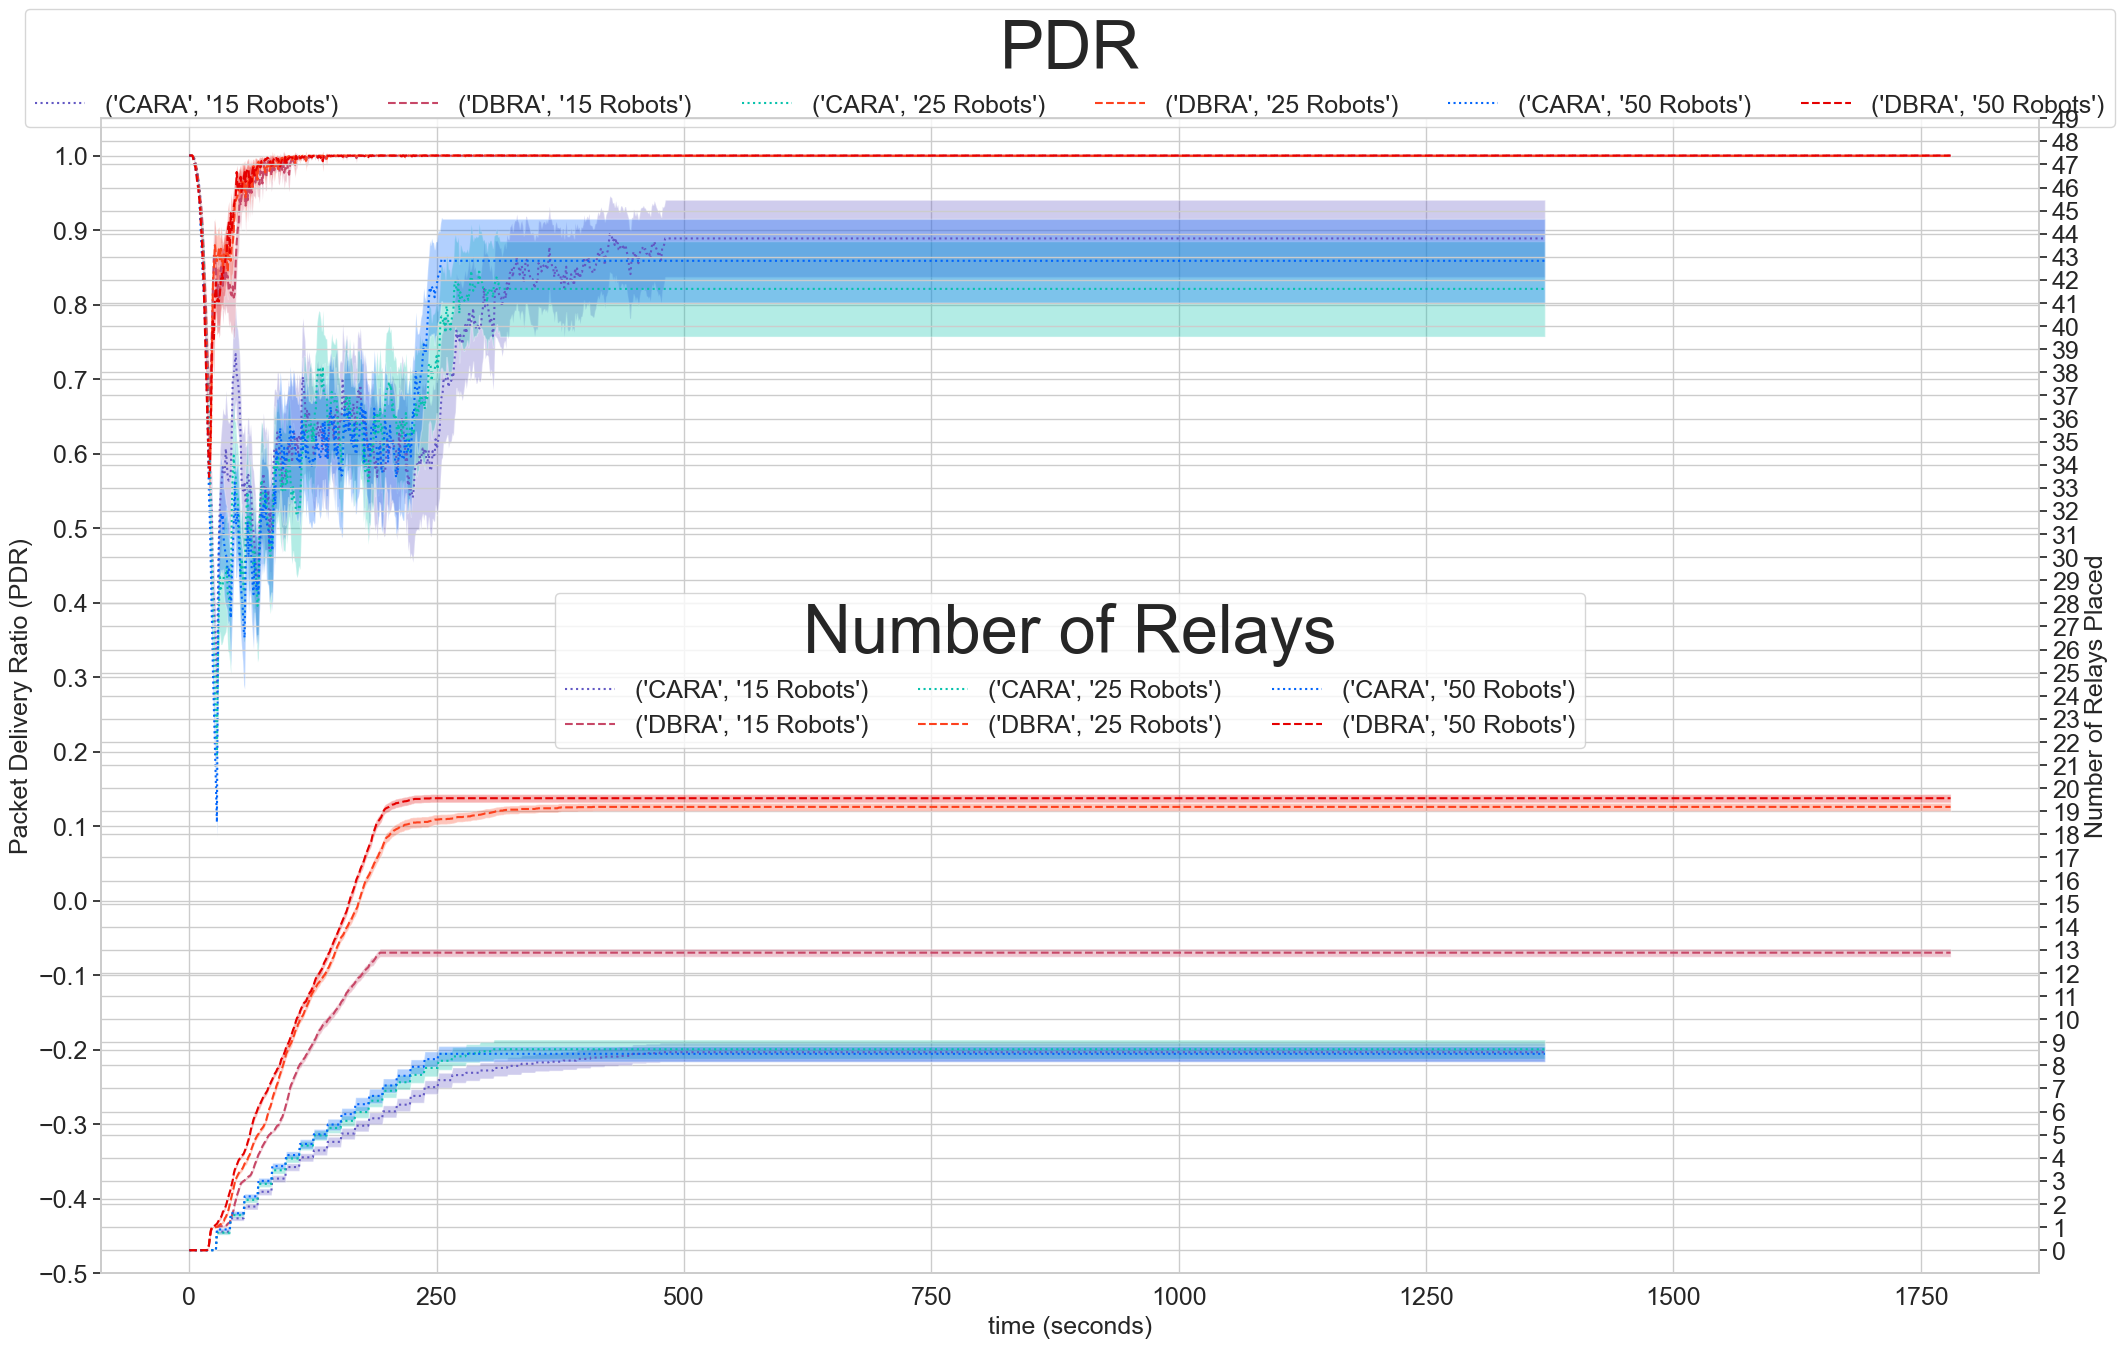

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


In [10]:
#============ Plot minimum PDR as Relays are placed with time
import math

plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [25, 15]

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# format -> data = {seed1: {config: {....}}, PDRs: [[1,1,1,1], [1,1,1,1], ...], numOfRelays: [0, 1,2, ..]},
#                   seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines       = [json.loads(l) for l in f]
    PDRs        = []
    numOfRelays = []
    time        = []
    for line in lines:
        if line["type"] == "simSetting":
            numRobots       = line['simSetting']['numRobots'] 
            floorplan       = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            seed            = line['simSetting']['seed']
            
        
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())):
            PDRs         += [min(line['PDRs'])]
            numOfRelays  += [line['numOfRelays']]
            time         += [line['time']]

    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "PDRs":            PDRs,
         "numOfRelays":     numOfRelays,
         "time":            time,
         "seed":            seed
        }
    ]

for d in data :
    if d["numOfRelays"][-1] == 0:
        print(d['seed'])
        
floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()

for floorplan in floorplans:
    (fig,ax)   = plt.subplots()
    ax2        = ax.twinx()
    lines      = {}
    linesfill  = {}
    rlines     = {}
    rlinesfill = {}
    for value in numRobots:
        toPlot = {}
        
        for relayAlgorithm in relayAlgorithms:
            toPlot[value] = {"mean": [], "yerr": [], "y1err": [], "y2err": [], "rmean": [], "ryerr": [], "ry1err": [], "ry2err": []}
            timelines       = [d['time'] for d in data if d['relayAlgorithm']==relayAlgorithm]        
            maxtime         = max([t[-1] for t in timelines])
            for i in range(int(maxtime)):
                try:
                    (pm, ph) = mean_confidence_interval(
                        [
                         d["PDRs"][i] for d in data            if 
                         d['numRobots']      == value          and 
                         d['floorplan']      == floorplan      and 
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )

                    (rm, rh) = mean_confidence_interval(
                        [
                         d["numOfRelays"][i] for d in data     if      
                         d['numRobots']      == value          and 
                         d['floorplan']      == floorplan      and 
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )

                except:
                    pass
                
                # for PDR
                toPlot[value]["mean"]    += [pm]
                toPlot[value]["yerr"]    += [ph]
                toPlot[value]["y1err"]   += [pm-ph]
                toPlot[value]["y2err"]   += [pm+ph]
                
                # for relays
                toPlot[value]["rmean"]    += [rm]
                toPlot[value]["ryerr"]    += [rh]
                toPlot[value]["ry1err"]   += [rm-rh]
                toPlot[value]["ry2err"]   += [rm+rh]

            y                             = toPlot[value]["mean"]
            x                             = np.arange(0, len(y))
            yerr                          = toPlot[value]["yerr"]
            lines[(floorplan, value)]     = ax.errorbar(x, y, linestyle=linestyles[relayAlgorithm],color=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            linesfill[(floorplan, value)] = ax.fill_between(x, toPlot[value]["y1err"], toPlot[value]["y2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
            
            ry                             = toPlot[value]["rmean"]
            rx                             = np.arange(0, len(y))          
            ryerr                          = toPlot[value]["ryerr"]
            rlines[(floorplan, value)]     = ax2.errorbar(rx, ry, linestyle=linestyles[relayAlgorithm], c=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            rlinesfill[(floorplan, value)] = ax2.fill_between(x, toPlot[value]["ry1err"], toPlot[value]["ry2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
    
    #convert x-axis to Logarithmic scale
    ax.grid(True)
    #plt.xscale("log")
    ax.set_xlabel("time (seconds)")
    ax.set_yticks(np.arange(-0.5, 1.2, 0.1))
    ax2.yaxis.set_ticks(np.arange(0, 50))
    ax.set_ylabel("Packet Delivery Ratio (PDR)")
    ax2.set_ylabel('Number of Relays Placed')
    ax.legend(title="PDR", fancybox=True, ncol=6, bbox_to_anchor=(0.5,1.105), loc="upper center")
    ax2.legend(title="Number of Relays", fancybox=True, ncol=3, bbox_to_anchor=(0.5,0.6), loc="upper center")
    #ax.set(ylim = (-0.5, 1.05), xlim = (0, 700))
    #ax2.set(xlim = (0, 700))
    ax.set(ylim = (-0.5, 1.05))
    ralllines     = rlines
    ralllinesfill = rlinesfill
    plt.show()
    fig.savefig(os.path.join('logs','minPDRwithRelays_{0}.eps'.format(floorplan)),bbox_inches='tight')
    fig.savefig(os.path.join('logs','minPDRwithRelays_{0}.pdf'.format(floorplan)),bbox_inches='tight')

office_small


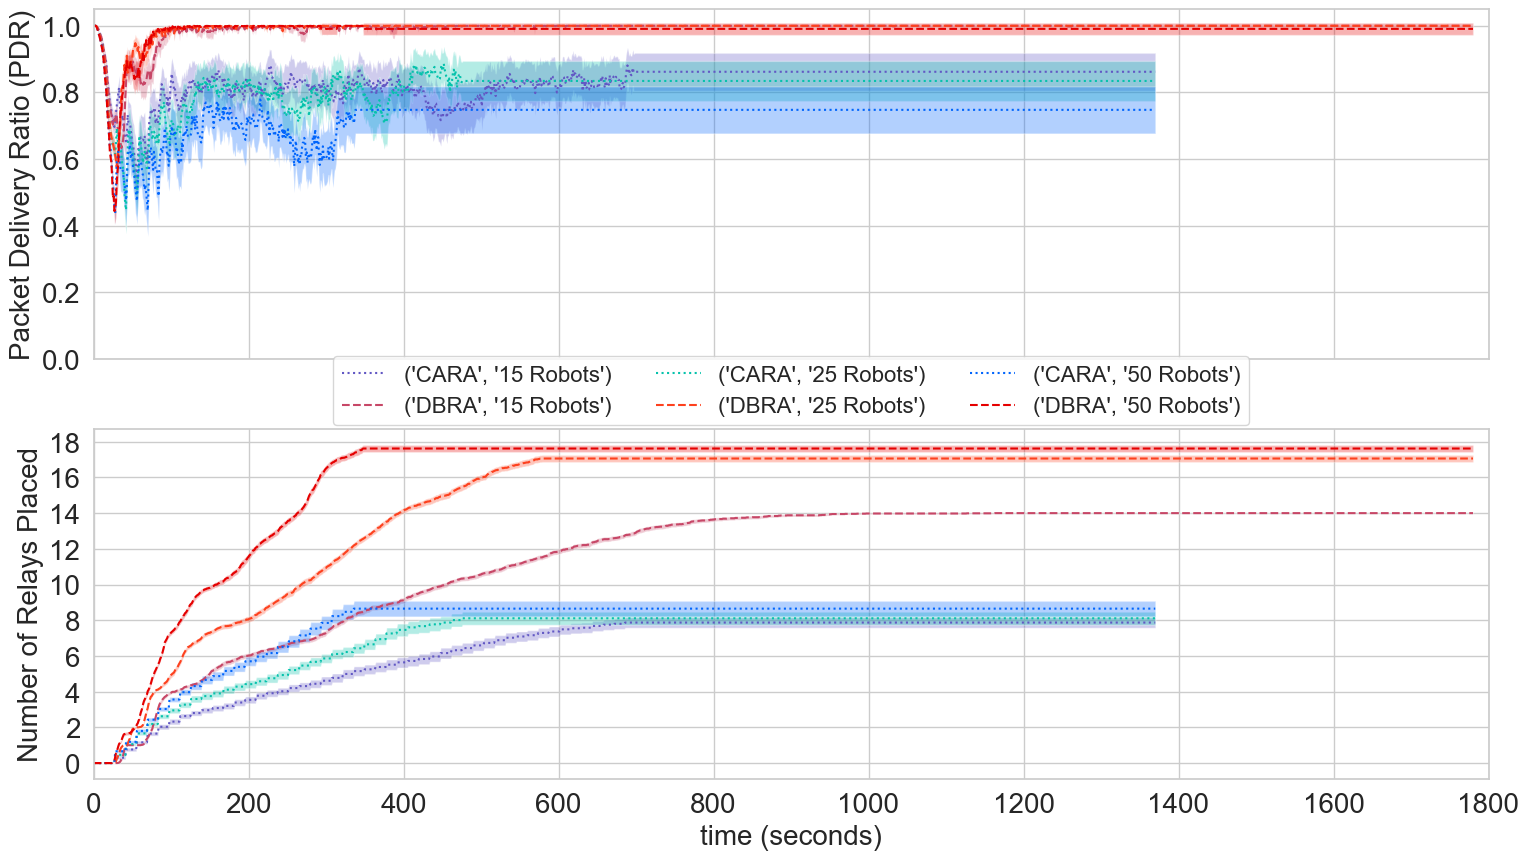

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


empty_small


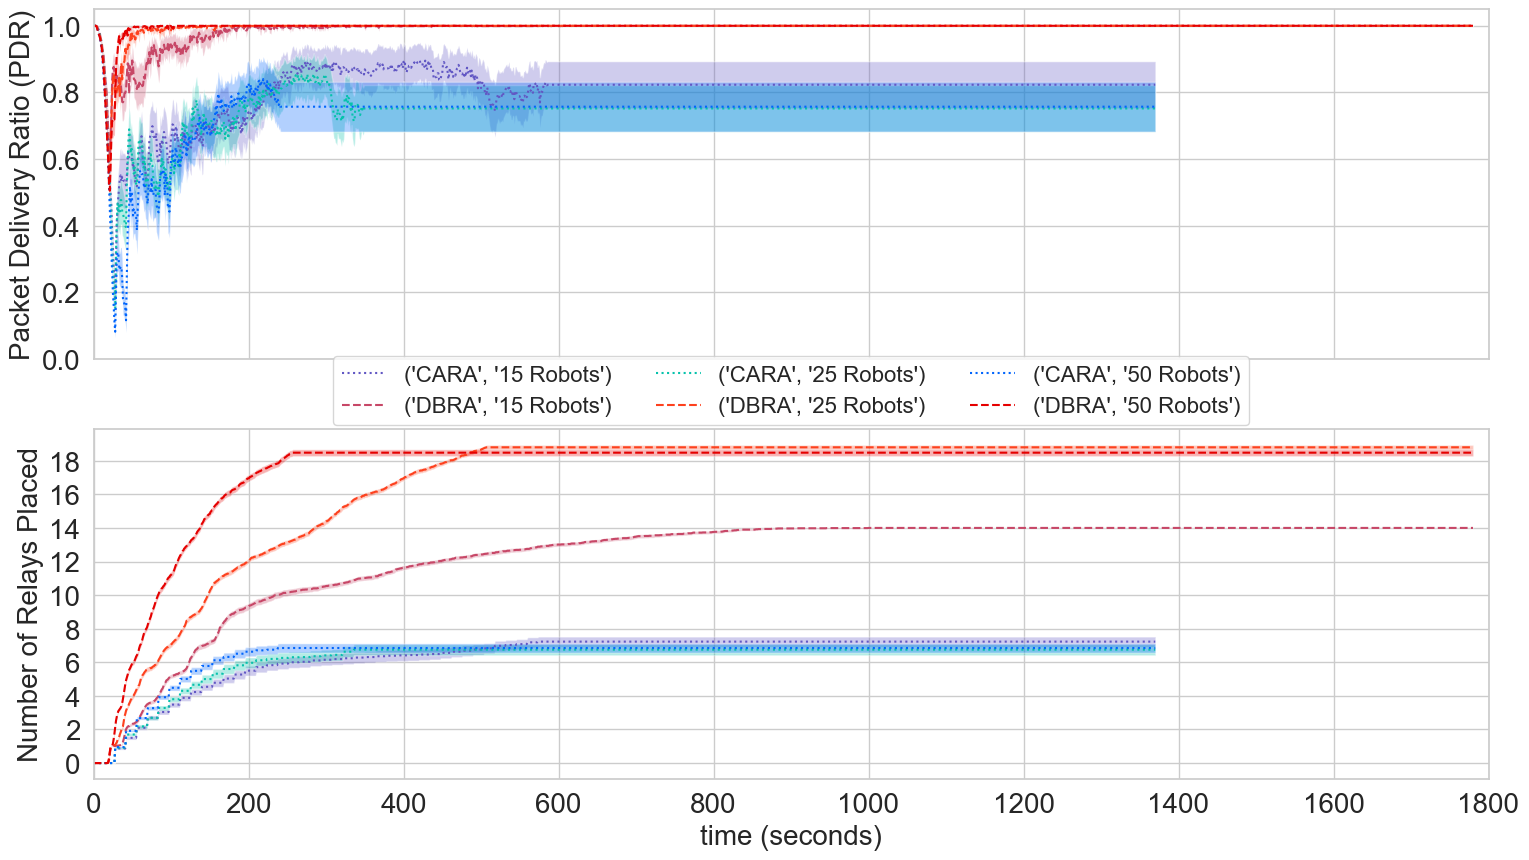

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


factory_small


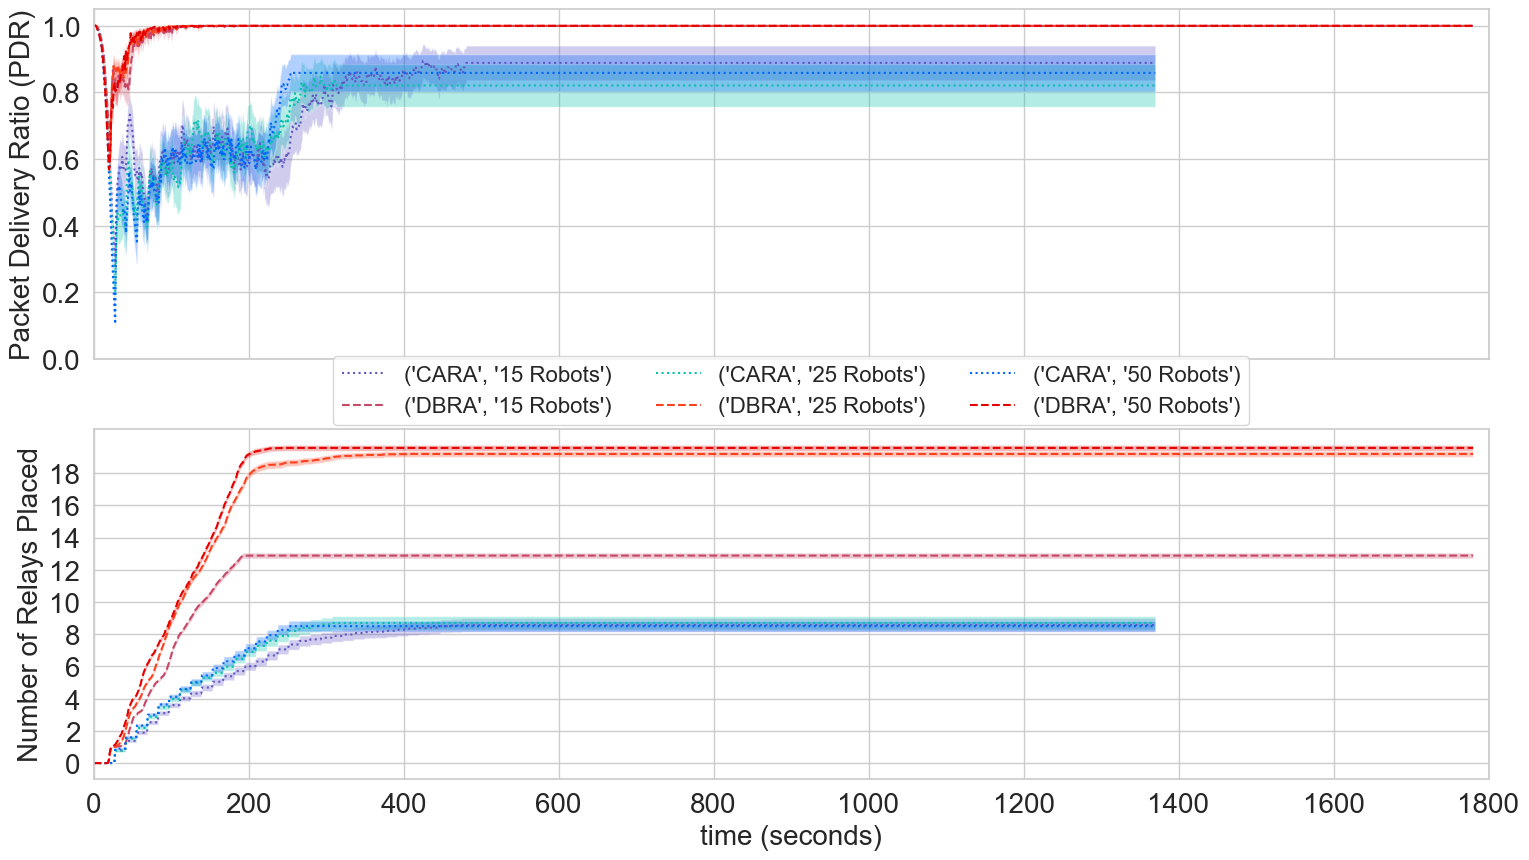

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


In [22]:
# formatting
#============ Plot minimum PDR as Relays are placed with time
import math

plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
#plt.rcParams['figure.figsize'] = [18, 10]

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 20

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# format -> data = {seed1: {config: {....}}, PDRs: [[1,1,1,1], [1,1,1,1], ...], numOfRelays: [0, 1,2, ..]},
#                   seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines       = [json.loads(l) for l in f]
    PDRs        = []
    numOfRelays = []
    time        = []
    for line in lines:
        if line["type"] == "simSetting":
            numRobots       = line['simSetting']['numRobots'] 
            floorplan       = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            seed            = line['simSetting']['seed']
            
        
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())):
            PDRs         += [min(line['PDRs'])]
            numOfRelays  += [line['numOfRelays']]
            time         += [line['time']]

    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "PDRs":            PDRs,
         "numOfRelays":     numOfRelays,
         "time":            time,
         "seed":            seed
        }
    ]

for d in data :
    if d["numOfRelays"][-1] == 0:
        print(d['seed'])
        
floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()

for floorplan in floorplans:
    print(floorplan)
    (fig,axs)   = plt.subplots(nrows= 2, ncols=1, sharex=True)
    ax         = axs[0]
    ax2        = axs[1]
    lines      = {}
    linesfill  = {}
    rlines     = {}
    rlinesfill = {}
    for value in numRobots:
        toPlot = {}
        
        for relayAlgorithm in relayAlgorithms:
            toPlot[value] = {"mean": [], "yerr": [], "y1err": [], "y2err": [], "rmean": [], "ryerr": [], "ry1err": [], "ry2err": []}
            timelines       = [d['time'] for d in data if d['relayAlgorithm']==relayAlgorithm]        
            maxtime         = max([t[-1] for t in timelines])
            for i in range(int(maxtime)):
                try:
                    (pm, ph) = mean_confidence_interval(
                        [
                         d["PDRs"][i] for d in data            if 
                         d['numRobots']      == value          and 
                         d['floorplan']      == floorplan      and 
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )

                    (rm, rh) = mean_confidence_interval(
                        [
                         d["numOfRelays"][i] for d in data     if      
                         d['numRobots']      == value          and 
                         d['floorplan']      == floorplan      and 
                         d['relayAlgorithm'] == relayAlgorithm
                        ]
                    )

                except:
                    pass
                
                # for PDR
                toPlot[value]["mean"]    += [pm]
                toPlot[value]["yerr"]    += [ph]
                toPlot[value]["y1err"]   += [pm-ph]
                toPlot[value]["y2err"]   += [pm+ph]
                
                # for relays
                toPlot[value]["rmean"]    += [rm]
                toPlot[value]["ryerr"]    += [rh]
                toPlot[value]["ry1err"]   += [rm-rh]
                toPlot[value]["ry2err"]   += [rm+rh]

            y                             = toPlot[value]["mean"]
            x                             = np.arange(0, len(y))
            yerr                          = toPlot[value]["yerr"]
            lines[(floorplan, value)]     = ax.errorbar(x, y, linestyle=linestyles[relayAlgorithm],color=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            linesfill[(floorplan, value)] = ax.fill_between(x, toPlot[value]["y1err"], toPlot[value]["y2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
            
            ry                             = toPlot[value]["rmean"]
            rx                             = np.arange(0, len(y))          
            ryerr                          = toPlot[value]["ryerr"]
            rlines[(floorplan, value)]     = ax2.errorbar(rx, ry, linestyle=linestyles[relayAlgorithm], c=linecolors[(value, relayAlgorithm)],label=(relayAlgorithm, str(value)+" Robots"))
            rlinesfill[(floorplan, value)] = ax2.fill_between(x, toPlot[value]["ry1err"], toPlot[value]["ry2err"] ,alpha=0.3, facecolor=linecolors[(value, relayAlgorithm)])
    
    #convert x-axis to Logarithmic scale
    ax.grid(True)
    ax2.grid(True)
    ax2.set_xlabel("time (seconds)")
    ax.set_yticks(np.arange(-0.5, 1.2, 0.1))
    ax2.yaxis.set_ticks(np.arange(0, 20))
    ax.set_ylabel("Packet Delivery Ratio (PDR)")
    ax2.set_ylabel('Number of Relays Placed')
    ax.legend(fancybox=True, ncol=3, bbox_to_anchor=(0.5,0.04), loc="upper center")
    ax.set(ylim = (0.0, 1.05), xlim = (0.0,1800))
    #ax2.set(xlim = (0, 700))
    ax.locator_params(axis="y", nbins=10)
    ax2.locator_params(axis="y", nbins=10)
    ralllines     = rlines
    ralllinesfill = rlinesfill
    plt.show()
    fig.savefig(os.path.join('logs','minPDRwithRelays_{0}.eps'.format(floorplan)),bbox_inches='tight')
    fig.savefig(os.path.join('logs','minPDRwithRelays_{0}.pdf'.format(floorplan)),bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


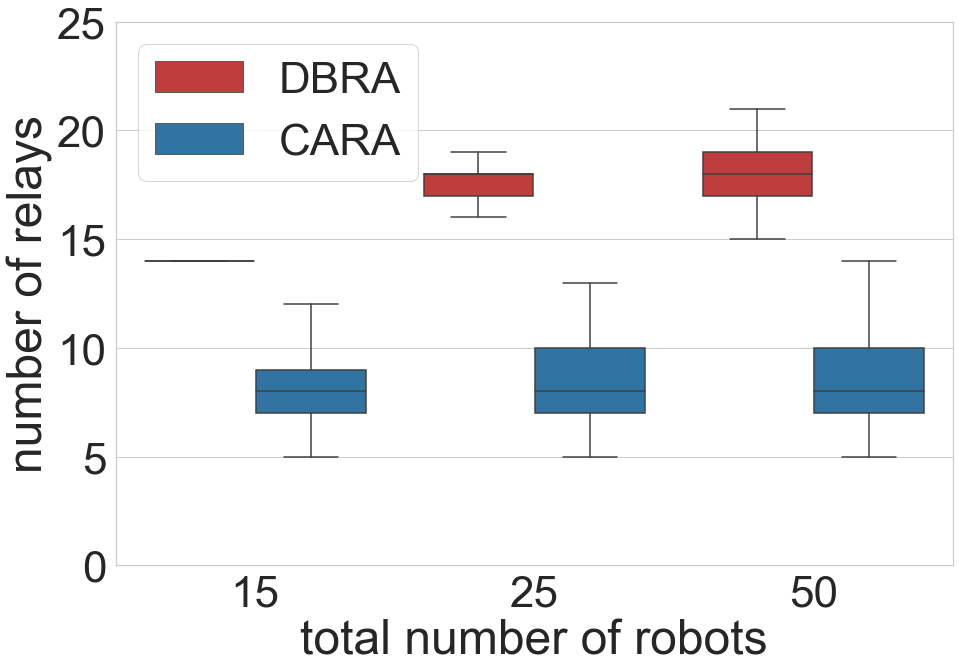

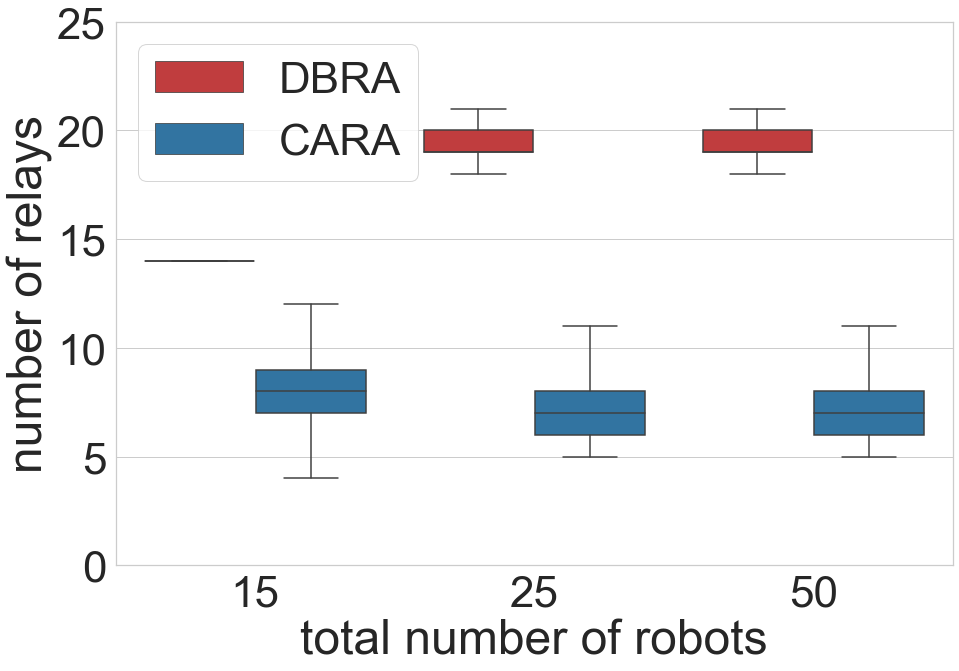

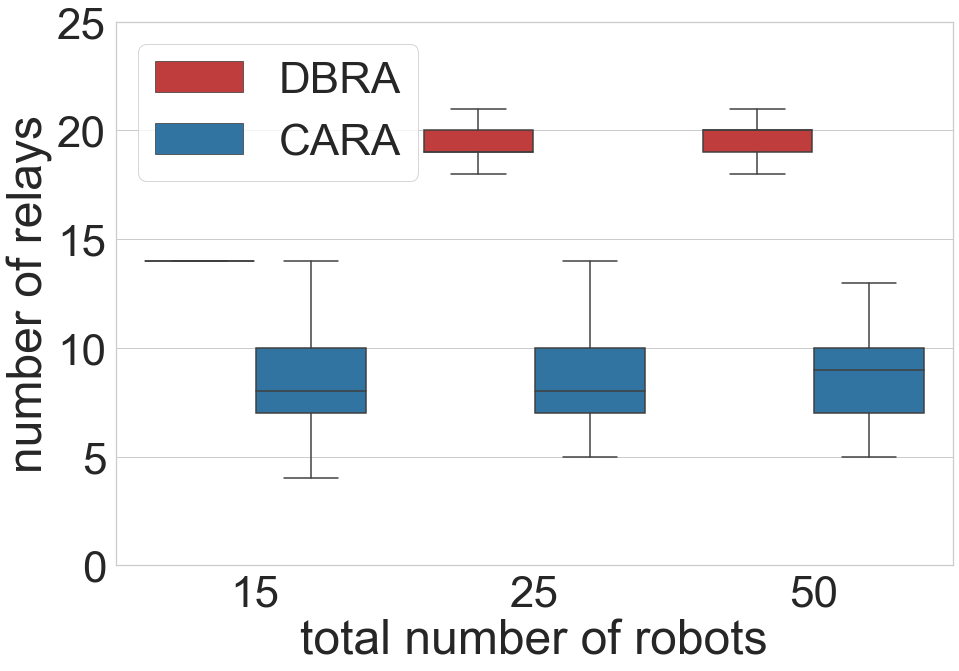

In [116]:
#============ Relays
plt.rcParams['pdf.fonttype']   = 42
plt.rcParams['ps.fonttype']    = 42
plt.rcParams['figure.figsize'] = [15, 10]

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# format -> data = {seed1: {config: {....}}, timeToCompletion: 2142}, seed2: {...} , ...}
data      =  []
for file in LOGFILES:
  FILENAME = file
  # gather
  with open(FILENAME,'r') as f:
    lines  = [json.loads(l) for l in f]
    for line in lines:
        if line["type"] == "simSetting":
            numRobots             = line['simSetting']['numRobots'] 
            floorplan             = line['simSetting']['floorplan'] 
            if line['simSetting']['relayAlgorithm'] == "SelfHealing":
                relayAlgorithm = "DBRA"
            elif line['simSetting']['relayAlgorithm'] == "Recovery":
                relayAlgorithm= "CARA"
            else:
                pass
            
        
        if ((line["type"] == "KPI") and ('PDRs' in line.keys())) :
            numOfRelays  += [line['numOfRelays']]
 
    data += [
        {"numRobots":       numRobots,
         "floorplan":       floorplan,
         "relayAlgorithm":  relayAlgorithm,
         "numOfRelays":     numOfRelays[-1],
        }
    ]

floorplans      = list(set([d['floorplan'] for d in data]))
relayAlgorithms = list(set([d['relayAlgorithm'] for d in data]))
numRobots       = list(set([d['numRobots'] for d in data]))
numRobots.sort()
my_palette      = {"DBRA": "tab:red", "CARA": "tab:blue"} 
sns.set(font_scale=4)
sns.set_style("whitegrid")
for floorplan in floorplans:
    (fig,ax) = plt.subplots()
    
    df  = pd.DataFrame([d for d in data if d['floorplan'] == floorplan])

    sns.boxplot(
        x="numRobots", y="numOfRelays", hue ="relayAlgorithm", palette=my_palette, data=df, hue_order=["DBRA", "CARA"], showfliers = False
    )
    plt.legend(loc="upper left")
    plt.ylabel("number of relays")
    plt.xlabel("total number of robots")
    ax.set(ylim = (0, 25))
    fig.savefig(os.path.join('logs','numRelays_{0}.eps'.format(floorplan)),bbox_inches='tight')
    fig.savefig(os.path.join('logs','numRelays_{0}.pdf'.format(floorplan)),bbox_inches='tight')
